In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import scipy
import seaborn as sns
import datetime
import matplotlib.dates as mdates
mpl.rcParams['figure.dpi']= 300

In [35]:
pit_weather_cmp = pd.read_csv('pittsburgh_weather_tmy3_2017_cmp.csv',
                             index_col = 0, skiprows = 3, header = 0, parse_dates = True)
bj_weather_cmp = pd.read_csv('beijing_weather_iwec_2017_cmp.csv',
                             index_col = 0, skiprows = 3, header = 0, parse_dates = True)
sh_weather_cmp = pd.read_csv('shanghai_weather_iwec_2017_cmp.csv',
                             index_col = 0, skiprows = 3, header = 0, parse_dates = True)
sg_weather_cmp = pd.read_csv('singapore_weather_iwec_2017_cmp.csv',
                             index_col = 0, skiprows = 3, header = 0, parse_dates = True)

In [36]:
# The max min values are based on Beijing Data
weather_norm_max_min = [[37.4, 17.858333], [100, 0], [360, 0], 
                        [8.825, 0], [897.916667, 0], [460.75, 0]]

In [37]:
tmy3_weather_column_names = ['TMY3:OAT', 'TMY3:OARH',
                          'TMY3:WD', 'TMY3:WS', 'TMY3:DirSR',
                          'TMY3:DifSR', '2017:OAT', '2017:OARH',
                          '2017:WD', '2017:WS', '2017:DirSR',
                          '2017:DifSR']

iwec_weather_column_names = ['IWEC:OAT', 'IWEC:OARH',
                          'IWEC:WD', 'IWEC:WS', 'IWEC:DirSR',
                          'IWEC:DifSR', '2017:OAT', '2017:OARH',
                          '2017:WD', '2017:WS', '2017:DirSR',
                          '2017:DifSR']
pit_weather_cmp.columns = tmy3_weather_column_names
bj_weather_cmp.columns = iwec_weather_column_names
sh_weather_cmp.columns = iwec_weather_column_names
sg_weather_cmp.columns = iwec_weather_column_names


In [38]:
pit_weather_cmp = pit_weather_cmp.resample('H').mean()
bj_weather_cmp = bj_weather_cmp.resample('H').mean()
sh_weather_cmp = sh_weather_cmp.resample('H').mean()
sg_weather_cmp = sg_weather_cmp.resample('H').mean()

In [39]:
def get_weather_cmp_reconstruct(weather_cmp_raw):
    weather_cmp_raw_reconstruct = [[],[],[]]
    column_num = weather_cmp_raw.columns.size
    for column_i in range(int(column_num/2)):
        column_name = weather_cmp_raw.columns[column_i]
        weather_cmp_raw_values_tmy3 = weather_cmp_raw[column_name].values
        if 'SR' in column_name:
            weather_cmp_raw_values_tmy3 = weather_cmp_raw_values_tmy3[weather_cmp_raw_values_tmy3 > 0]
        weather_cmp_raw_values_max = weather_norm_max_min[column_i][0]
        weather_cmp_raw_values_min = weather_norm_max_min[column_i][1]
        weather_cmp_raw_values_tmy3 = ((weather_cmp_raw_values_tmy3 - weather_cmp_raw_values_min)/
                                  (weather_cmp_raw_values_max - weather_cmp_raw_values_min))
        entry_length = weather_cmp_raw_values_tmy3.size
        data_type_source = column_name.split(':')[0]
        data_type_type = column_name.split(':')[1]
        weather_cmp_raw_reconstruct[0].extend(weather_cmp_raw_values_tmy3.tolist())
        weather_cmp_raw_reconstruct[1].extend([data_type_source for _ in range(entry_length)])
        weather_cmp_raw_reconstruct[2].extend([data_type_type for _ in range(entry_length)])

        column_name = weather_cmp_raw.columns[column_i + 6]
        weather_cmp_raw_values_2017 = weather_cmp_raw[column_name].values
        if 'SR' in column_name:
            weather_cmp_raw_values_2017 = weather_cmp_raw_values_2017[weather_cmp_raw_values_2017 > 0]
        weather_cmp_raw_values_2017 = ((weather_cmp_raw_values_2017 - weather_cmp_raw_values_min)/
                                  (weather_cmp_raw_values_max - weather_cmp_raw_values_min))
        entry_length = weather_cmp_raw_values_2017.size
        data_type_source = column_name.split(':')[0]
        data_type_type = column_name.split(':')[1]
        weather_cmp_raw_reconstruct[0].extend(weather_cmp_raw_values_2017.tolist())
        weather_cmp_raw_reconstruct[1].extend([data_type_source for _ in range(entry_length)])
        weather_cmp_raw_reconstruct[2].extend([data_type_type for _ in range(entry_length)])

    weather_cmp_raw_reconstruct = np.array(weather_cmp_raw_reconstruct).T
    weather_cmp_raw_reconstruct = pd.DataFrame(weather_cmp_raw_reconstruct, columns = ['Normalized Value', 'Data Source', 'Weather Parameters'])
    weather_cmp_raw_reconstruct[['Normalized Value']] = weather_cmp_raw_reconstruct[['Normalized Value']].apply(pd.to_numeric)
    return weather_cmp_raw_reconstruct

In [40]:
pit_weather_cmp_reconstruct = get_weather_cmp_reconstruct(pit_weather_cmp)
bj_weather_cmp_reconstruct = get_weather_cmp_reconstruct(bj_weather_cmp)
sh_weather_cmp_reconstruct = get_weather_cmp_reconstruct(sh_weather_cmp)
sg_weather_cmp_reconstruct = get_weather_cmp_reconstruct(sg_weather_cmp)


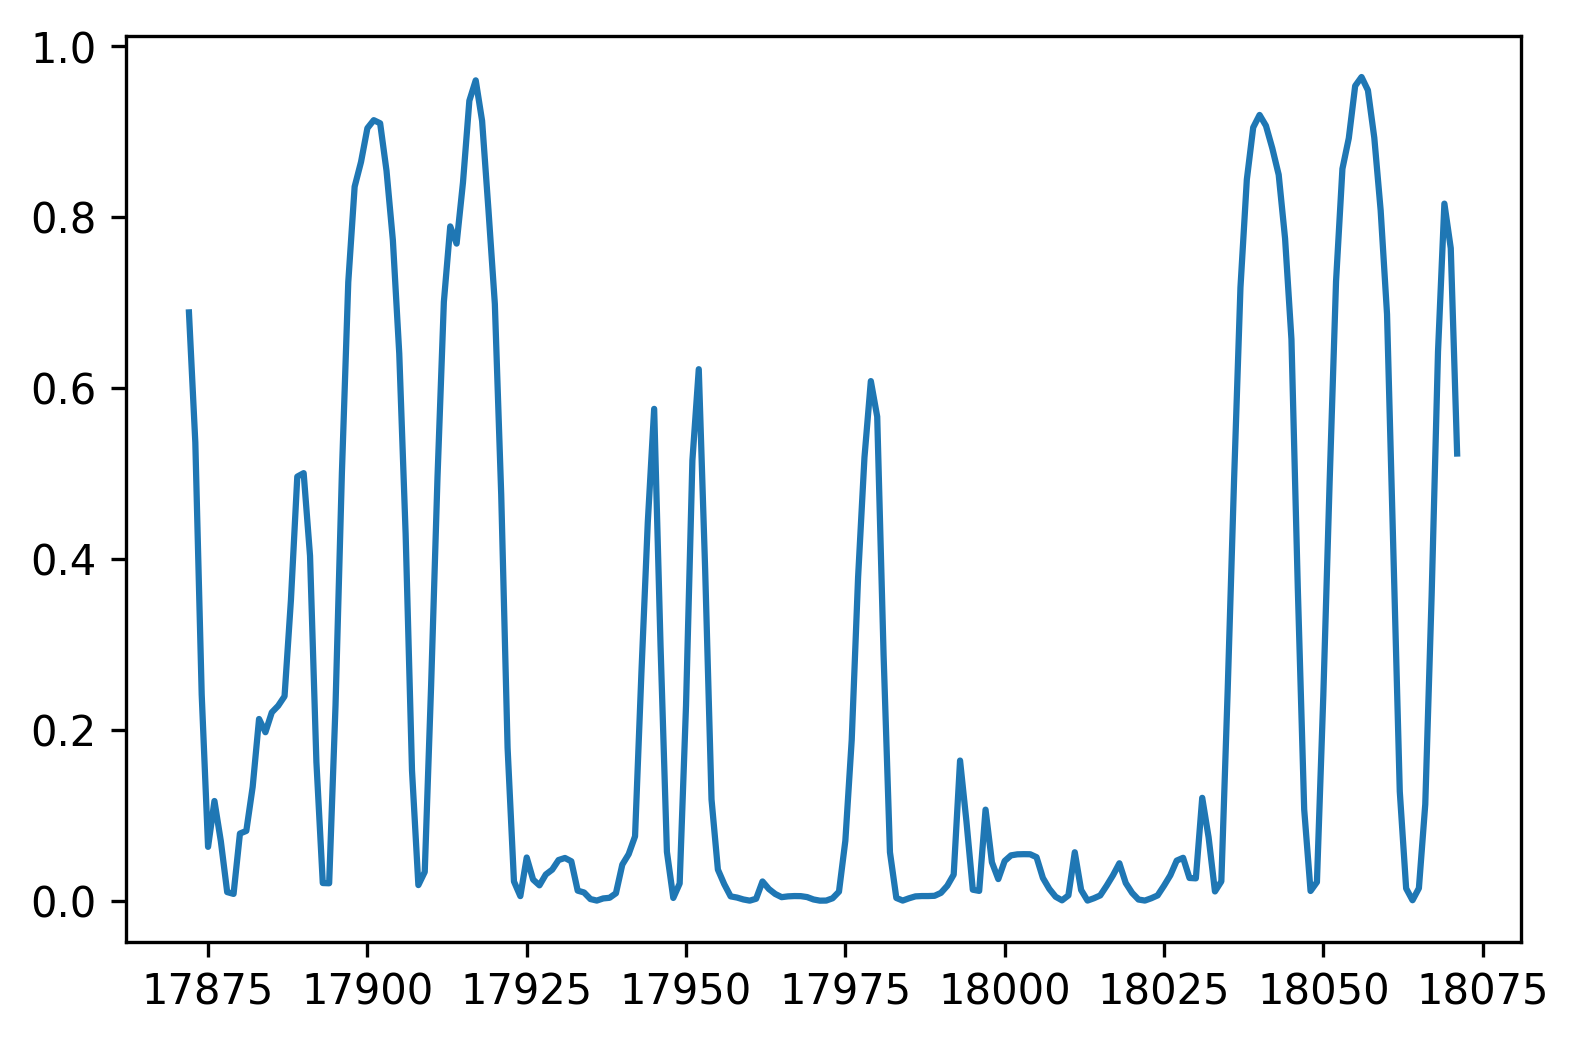

In [232]:
plt.plot(bj_weather_cmp_reconstruct[((bj_weather_cmp_reconstruct['Weather Parameters'] == 'DirSR') &
                                     (bj_weather_cmp_reconstruct['Data Source'] == 'IWEC'))]['Normalized Value'][200:400])

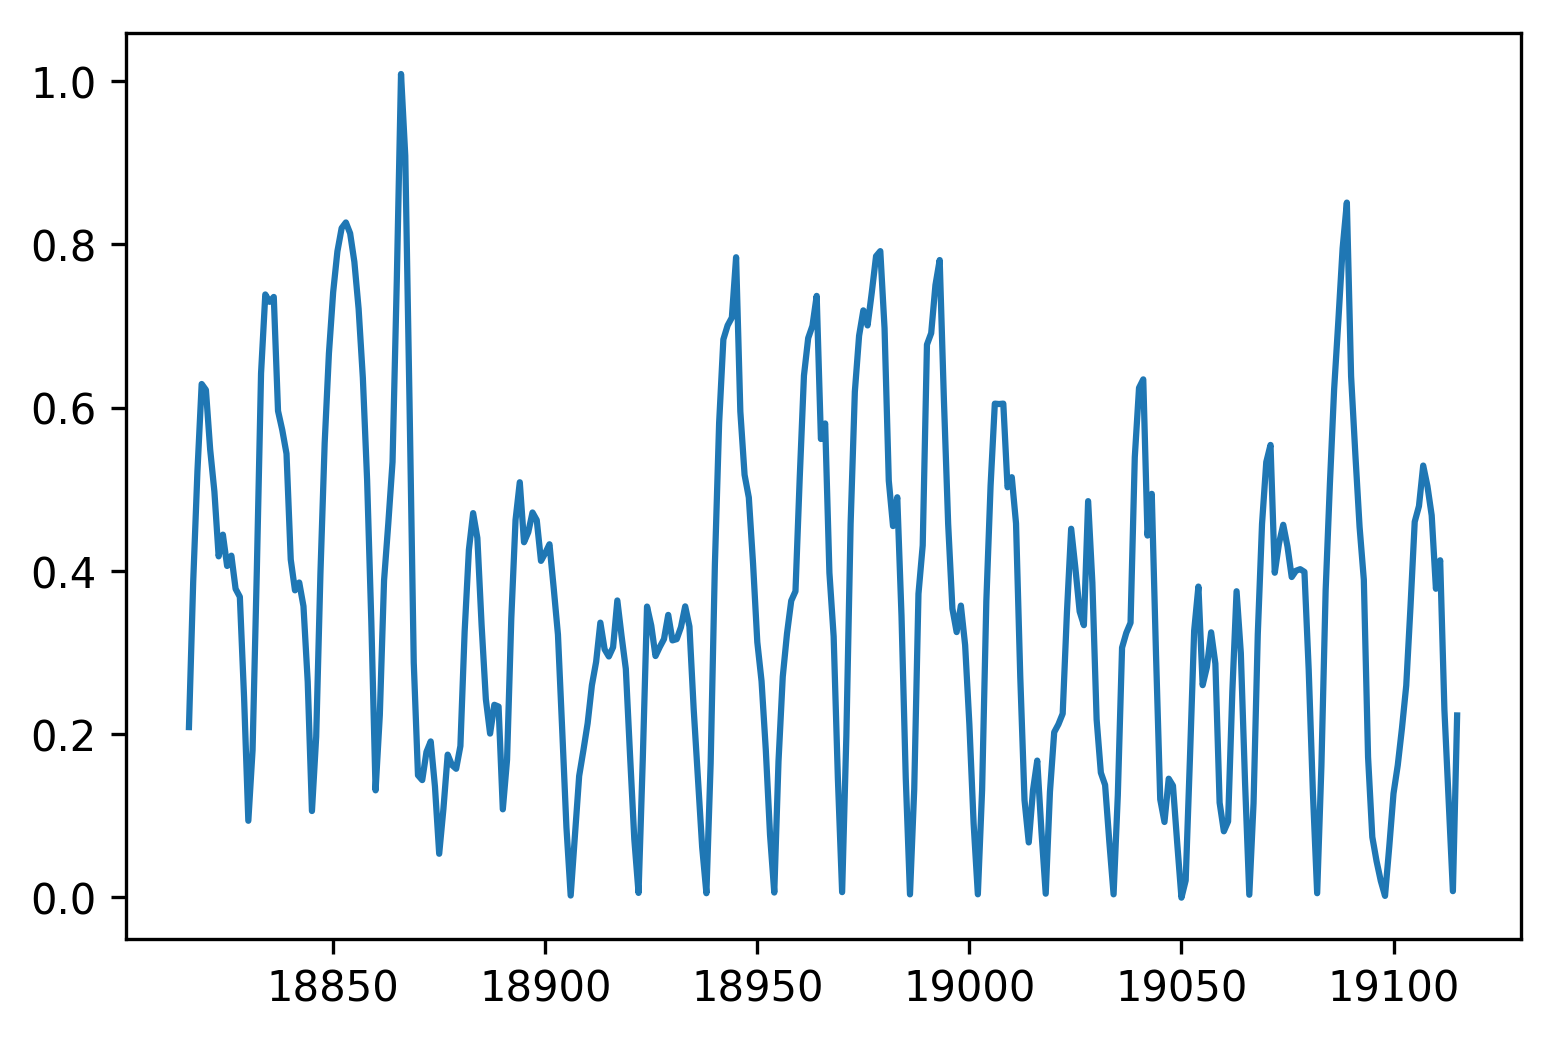

In [228]:
plt.plot(pit_weather_cmp_reconstruct[((pit_weather_cmp_reconstruct['Weather Parameters'] == 'DirSR') &
                                     (pit_weather_cmp_reconstruct['Data Source'] == '2017'))]['Normalized Value'][0:300])

In [169]:
pit_weather_cmp_reconstruct

Normalized Value Data Source Weather Parameters
0              0.409091        TMY3                OAT
1              0.448295        TMY3                OAT
2              0.432576        TMY3                OAT
3              0.416477        TMY3                OAT
4              0.429924        TMY3                OAT
5              0.433712        TMY3                OAT
6              0.429924        TMY3                OAT
7              0.454545        TMY3                OAT
8              0.487879        TMY3                OAT
9              0.556439        TMY3                OAT
10             0.611742        TMY3                OAT
11             0.628030        TMY3                OAT
12             0.605682        TMY3                OAT
13             0.590909        TMY3                OAT
14             0.570076        TMY3                OAT
15             0.566288        TMY3                OAT
16             0.590909        TMY3                OAT
17             0.611742        TMY3                OAT
18             0.615530        TMY3                OAT
19             0.570076        TMY3                OAT
20             0.524621        TMY3                OAT
21             0.437500        TMY3                OAT
22             0.363636        TMY3                OAT
23             0.363636        TMY3                OAT
24             0.363636        TMY3                OAT
25             0.321970        TMY3                OAT
26             0.272727        TMY3                OAT
27             0.251894        TMY3                OAT
28             0.227273        TMY3                OAT
29             0.248106        TMY3                OAT
...                 ...         ...                ...
24842          0.217797        2017              DifSR
24843          0.065508        2017              DifSR
24844          0.006097        2017              DifSR
24845          0.099970        2017              DifSR
24846          0.243568        2017              DifSR
24847          0.345959        2017              DifSR
24848          0.440740        2017              DifSR
24849          0.495525        2017              DifSR
24850          0.519306        2017              DifSR
24851          0.506291        2017              DifSR
24852          0.490725        2017              DifSR
24853          0.451075        2017              DifSR
24854          0.410343        2017              DifSR
24855          0.346175        2017              DifSR
24856          0.212090        2017              DifSR
24857          0.063749        2017              DifSR
24858          0.005967        2017              DifSR
24859          0.096467        2017              DifSR
24860          0.230337        2017              DifSR
24861          0.364639        2017              DifSR
24862          0.554374        2017              DifSR
24863          0.632853        2017              DifSR
24864          0.689627        2017              DifSR
24865          0.753665        2017              DifSR
24866          0.721970        2017              DifSR
24867          0.621784        2017              DifSR
24868          0.478272        2017              DifSR
24869          0.345138        2017              DifSR
24870          0.197907        2017              DifSR
24871          0.059872        2017              DifSR

[24872 rows x 3 columns]

In [156]:
plt.plot(pit_weather_cmp_reconstruct['values'])

KeyError: 'values'

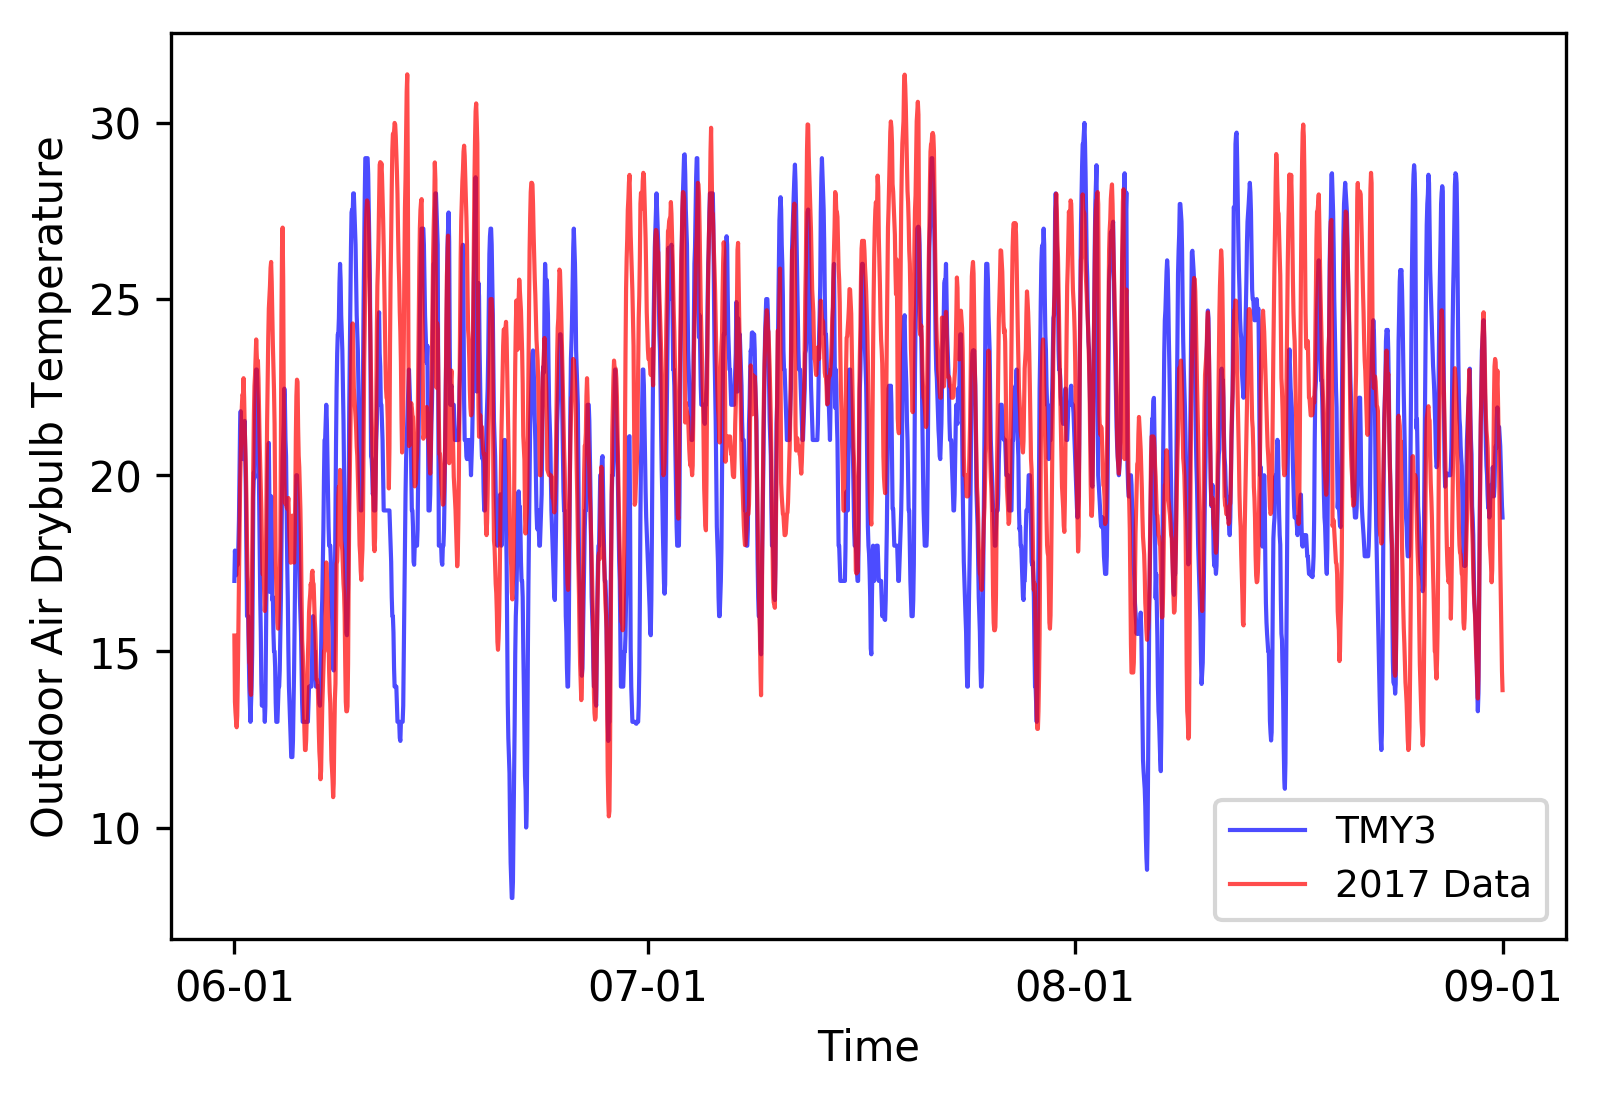

In [78]:
# OAT point-to-point cmp
basetime = datetime.datetime.strptime('2012-06-01', '%Y-%m-%d').date()
x_plot = np.array([basetime + datetime.timedelta(days=i) for i in range(92)])
yearsFmt = mdates.DateFormatter('%m-%d')
months = mdates.MonthLocator()  # every month

plt.plot(pit_weather_cmp['TMY3:Outdoor Air Drybulb Temperature'], color = 'blue',
        label = 'TMY3', linewidth = 1, alpha=0.7)
plt.plot(pit_weather_cmp['2017:Outdoor Air Drybulb Temperature'], color = 'red',
        label = '2017 Data', linewidth = 1, alpha=0.7)

plt.xlabel('Time', fontsize = 10)
plt.ylabel('Outdoor Air Drybulb Temperature', fontsize = 10)
plt.legend(fontsize = 9, loc="best")
plt.gca().xaxis.set_major_formatter(yearsFmt)
plt.gca().xaxis.set_major_locator(months)

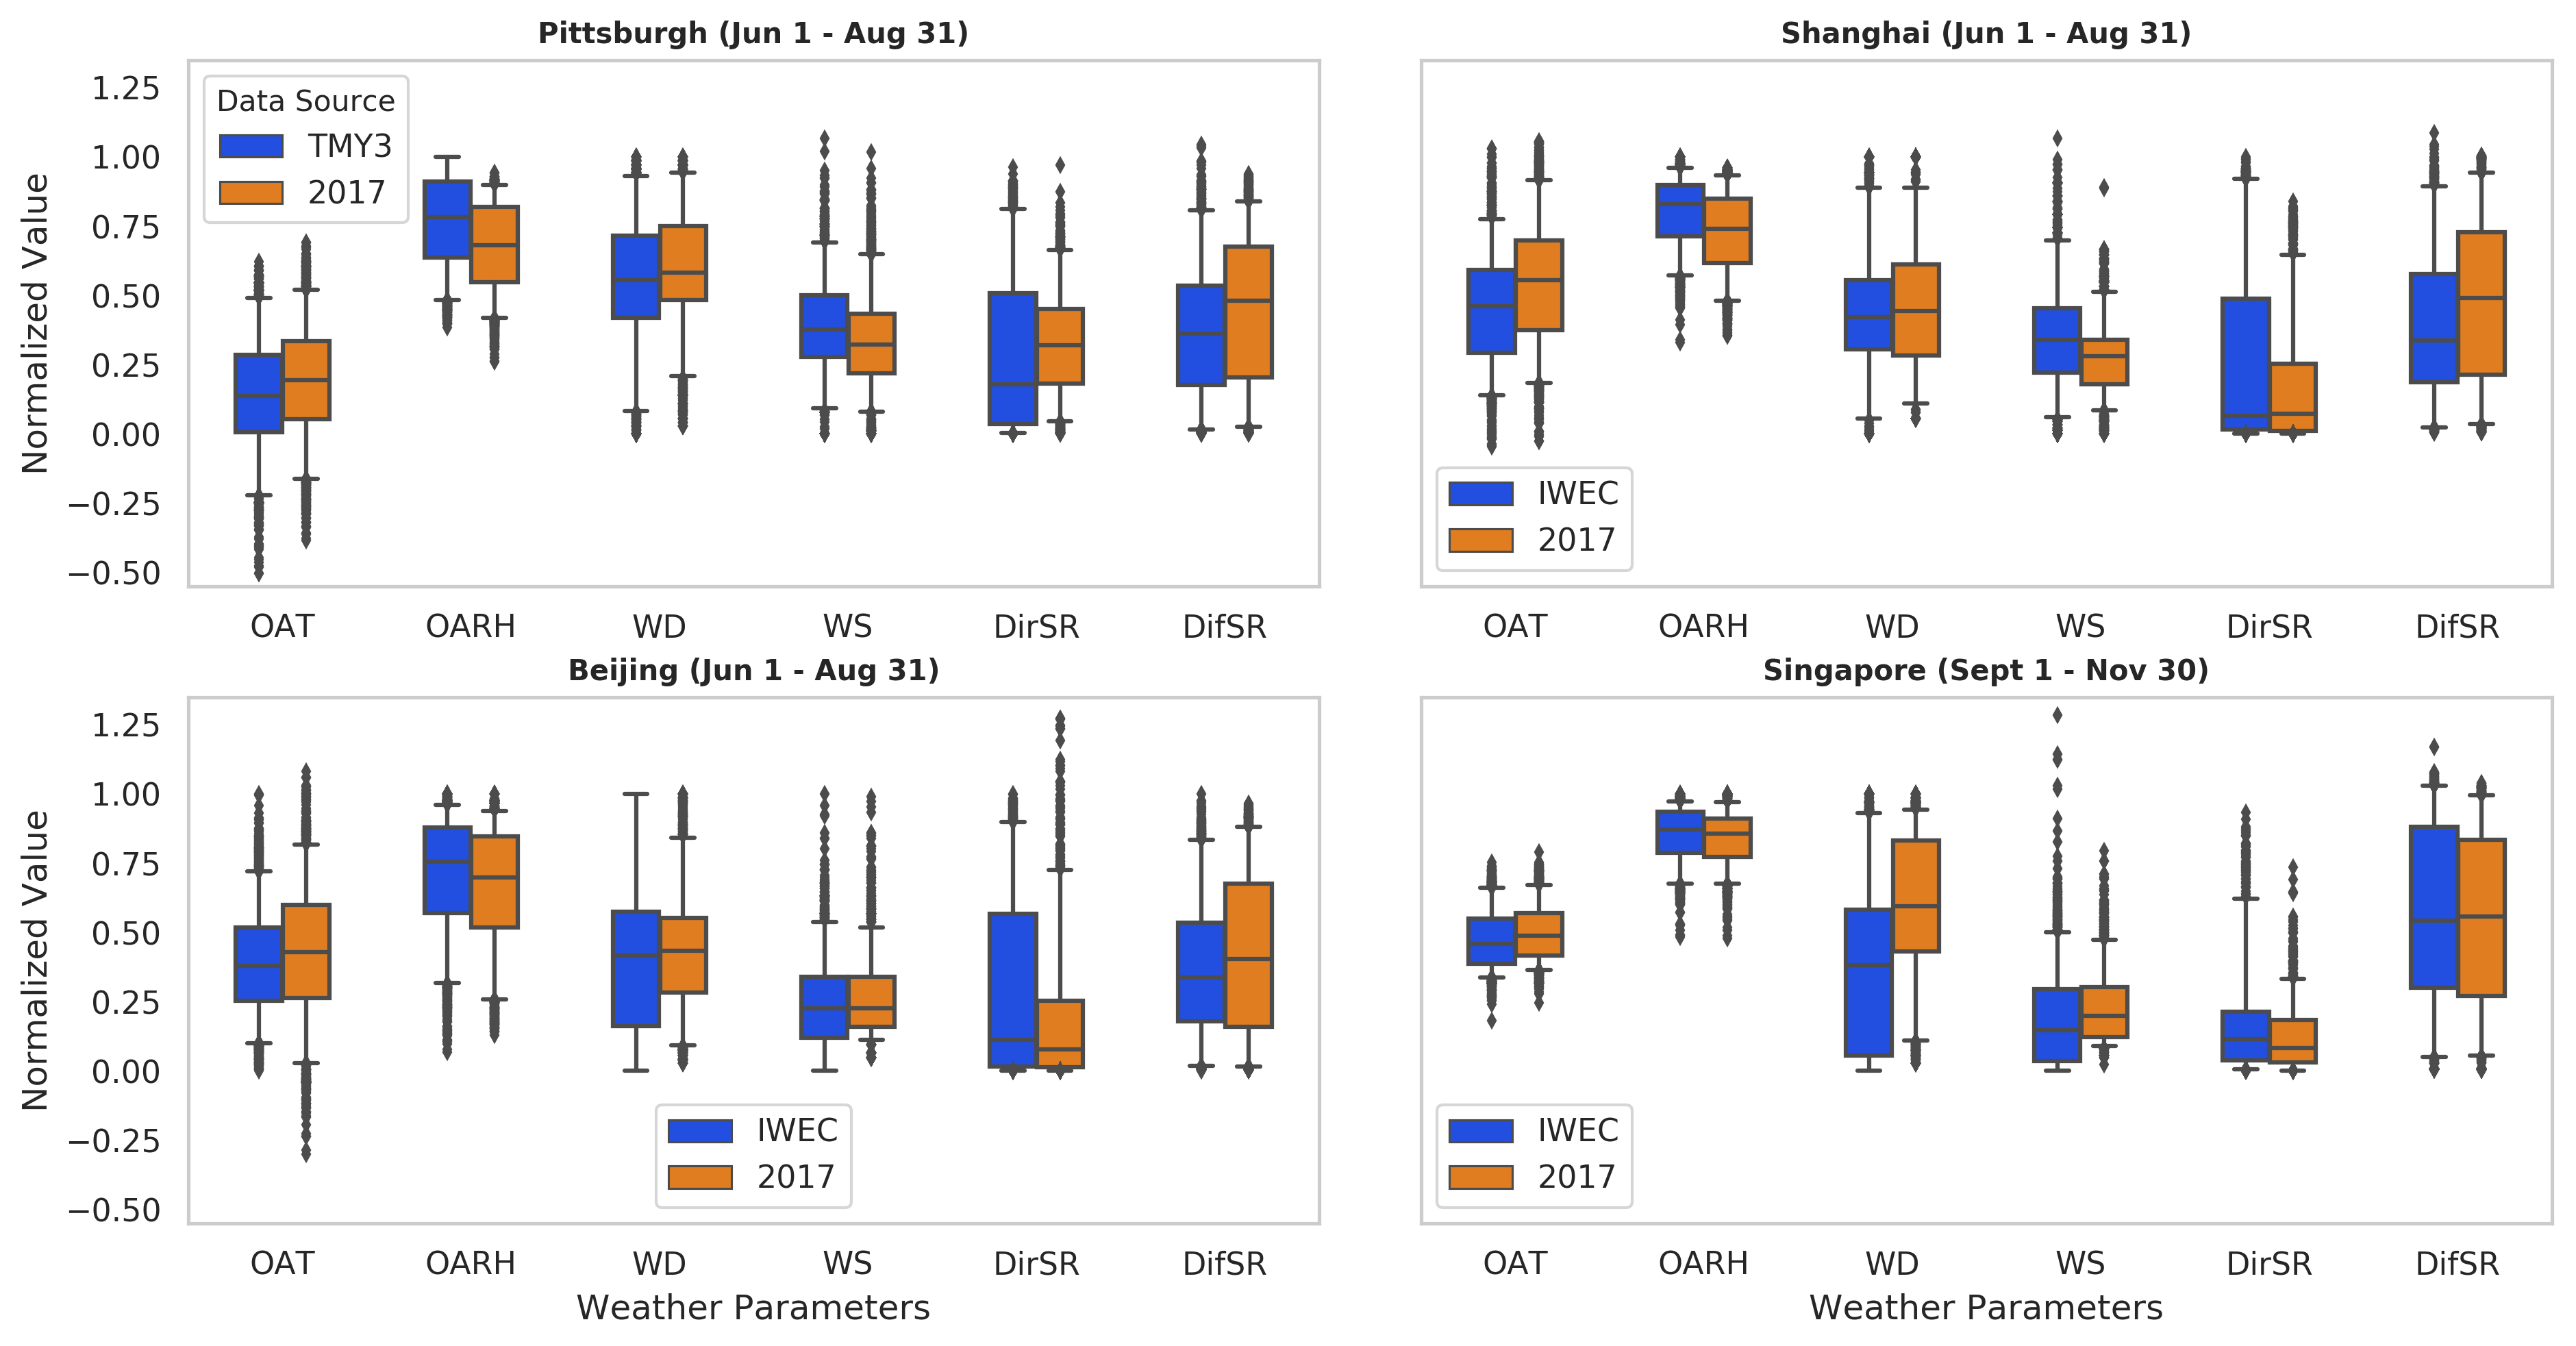

In [315]:
plt.figure(figsize=(12,6), facecolor='white')
ax1 = plt.subplot2grid((2, 2), (0, 0))
ax2 = plt.subplot2grid((2, 2), (1, 0))
ax3 = plt.subplot2grid((2, 2), (0, 1))
ax4 = plt.subplot2grid((2, 2), (1, 1))
plt.tight_layout(pad=0.0, w_pad=0.0, h_pad=1.2)
sns.set(font_scale=1.0)
sns.set_style("whitegrid")
# Weather Pit
sns.boxplot(x = 'Weather Parameters', y = 'Normalized Value', hue = 'Data Source', data = pit_weather_cmp_reconstruct
            , palette = 'bright', width = 0.5, whis = [5, 95], fliersize = 3, ax = ax1)
ax1.set_title('Pittsburgh (Jun 1 - Aug 31)', fontsize = 10, fontweight='bold')
ax1.set_ylim(-0.55, 1.35)
# Weather Bj
sns.boxplot(x = 'Weather Parameters', y = 'Normalized Value', hue = 'Data Source', data = bj_weather_cmp_reconstruct
            , palette = 'bright', width = 0.5, whis = [5, 95], fliersize = 3, ax = ax2)
ax2.set_title('Beijing (Jun 1 - Aug 31)', fontsize = 10, fontweight='bold')
ax2.set_ylim(-0.55, 1.35)
ax2.legend(loc = 'lower center')
# Weather Sh
sns.boxplot(x = 'Weather Parameters', y = 'Normalized Value', hue = 'Data Source', data = sh_weather_cmp_reconstruct
            , palette = 'bright', width = 0.5, whis = [5, 95], fliersize = 3, ax = ax3)
ax3.set_title('Shanghai (Jun 1 - Aug 31)', fontsize = 10, fontweight='bold')
ax3.set_ylim(-0.55, 1.35)
ax3.legend(loc = 'lower left')

# Weather Sg
sns.boxplot(x = 'Weather Parameters', y = 'Normalized Value', hue = 'Data Source', data = sg_weather_cmp_reconstruct
            , palette = 'bright', width = 0.5, whis = [5, 95], fliersize = 3, ax = ax4)
ax4.set_title('Singapore (Sept 1 - Nov 30)', fontsize = 10, fontweight='bold')
ax4.set_ylim(-0.55, 1.35)
ax4.legend(loc = 'lower left')
# Remove some axises
ax1.get_xaxis().get_label().set_visible(False)
ax3.get_xaxis().get_label().set_visible(False)
ax3.set_yticklabels([])
ax3.get_yaxis().get_label().set_visible(False)
ax4.set_yticklabels([])
ax4.get_yaxis().get_label().set_visible(False)
ax1.grid(False)
ax2.grid(False)
ax3.grid(False)
ax4.grid(False)

In [281]:
# Weather BJ
fig = plt.figure(figsize=(6, 4))



<Figure size 1800x1200 with 0 Axes>

(-0.55, 1.35)

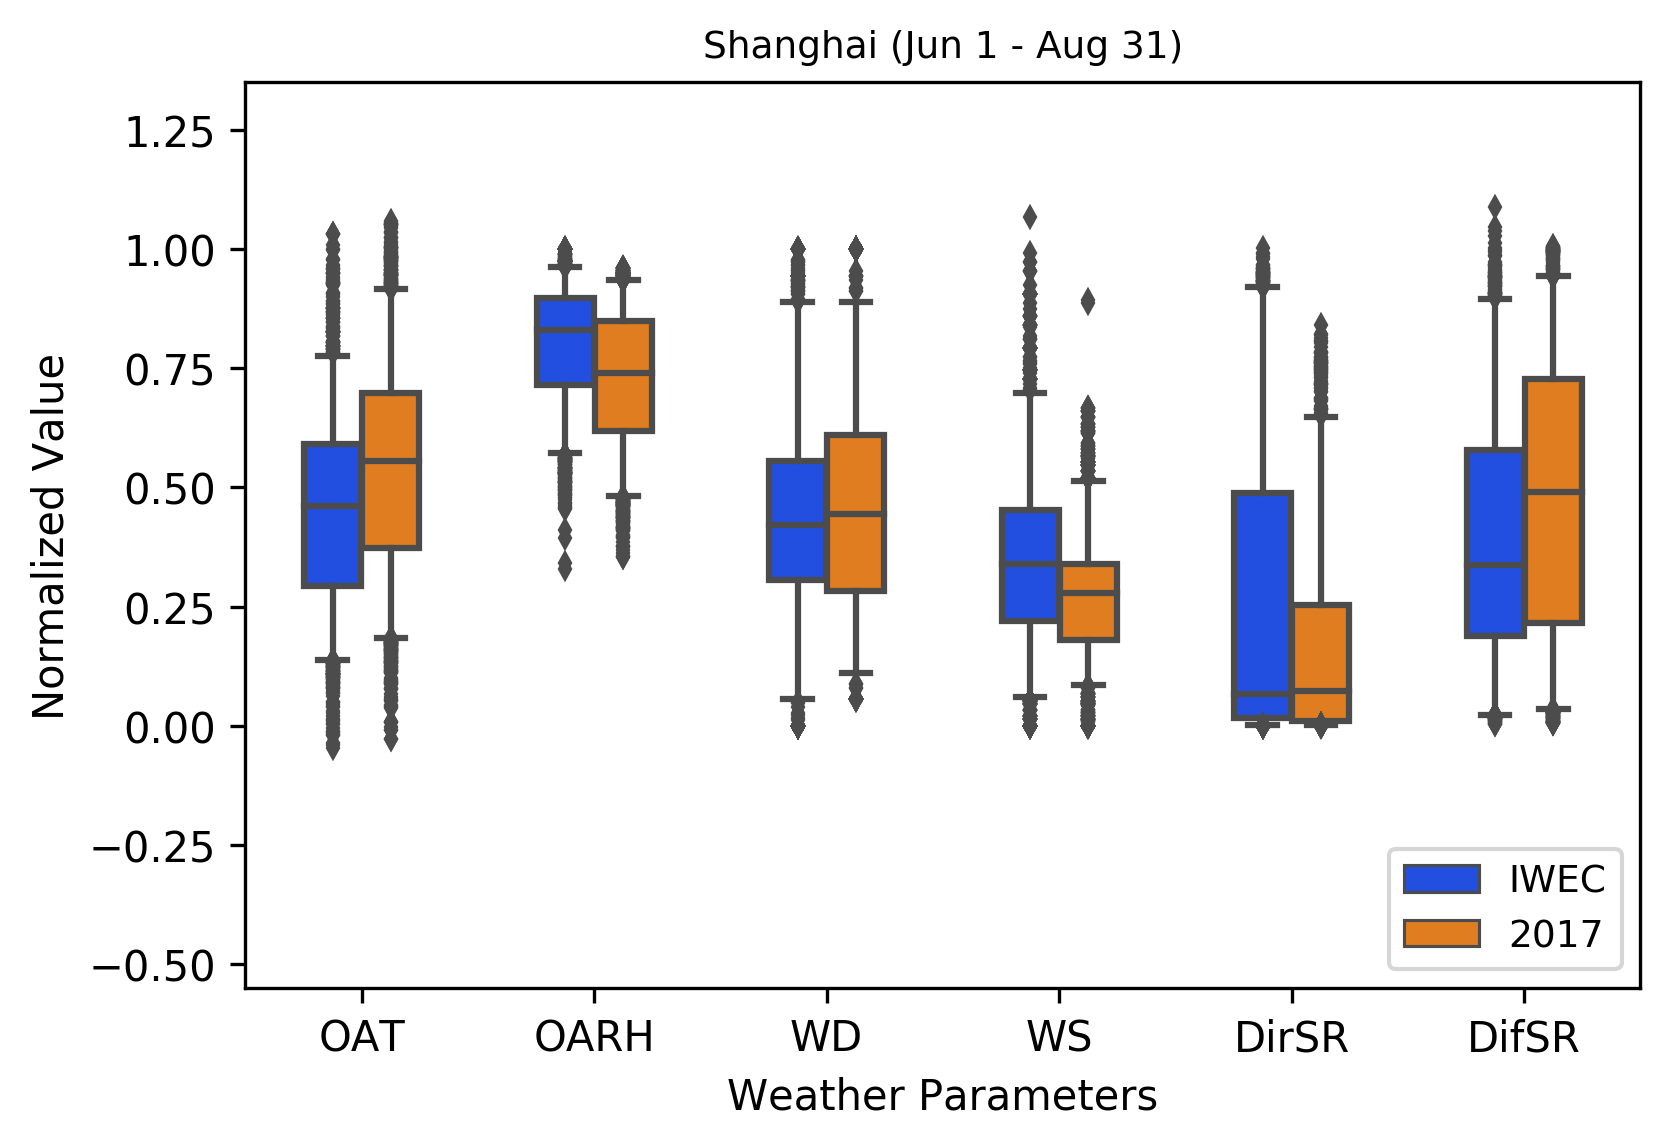

In [269]:
# Weather SH
fig = plt.figure(figsize=(6, 4))


(-0.55, 1.35)

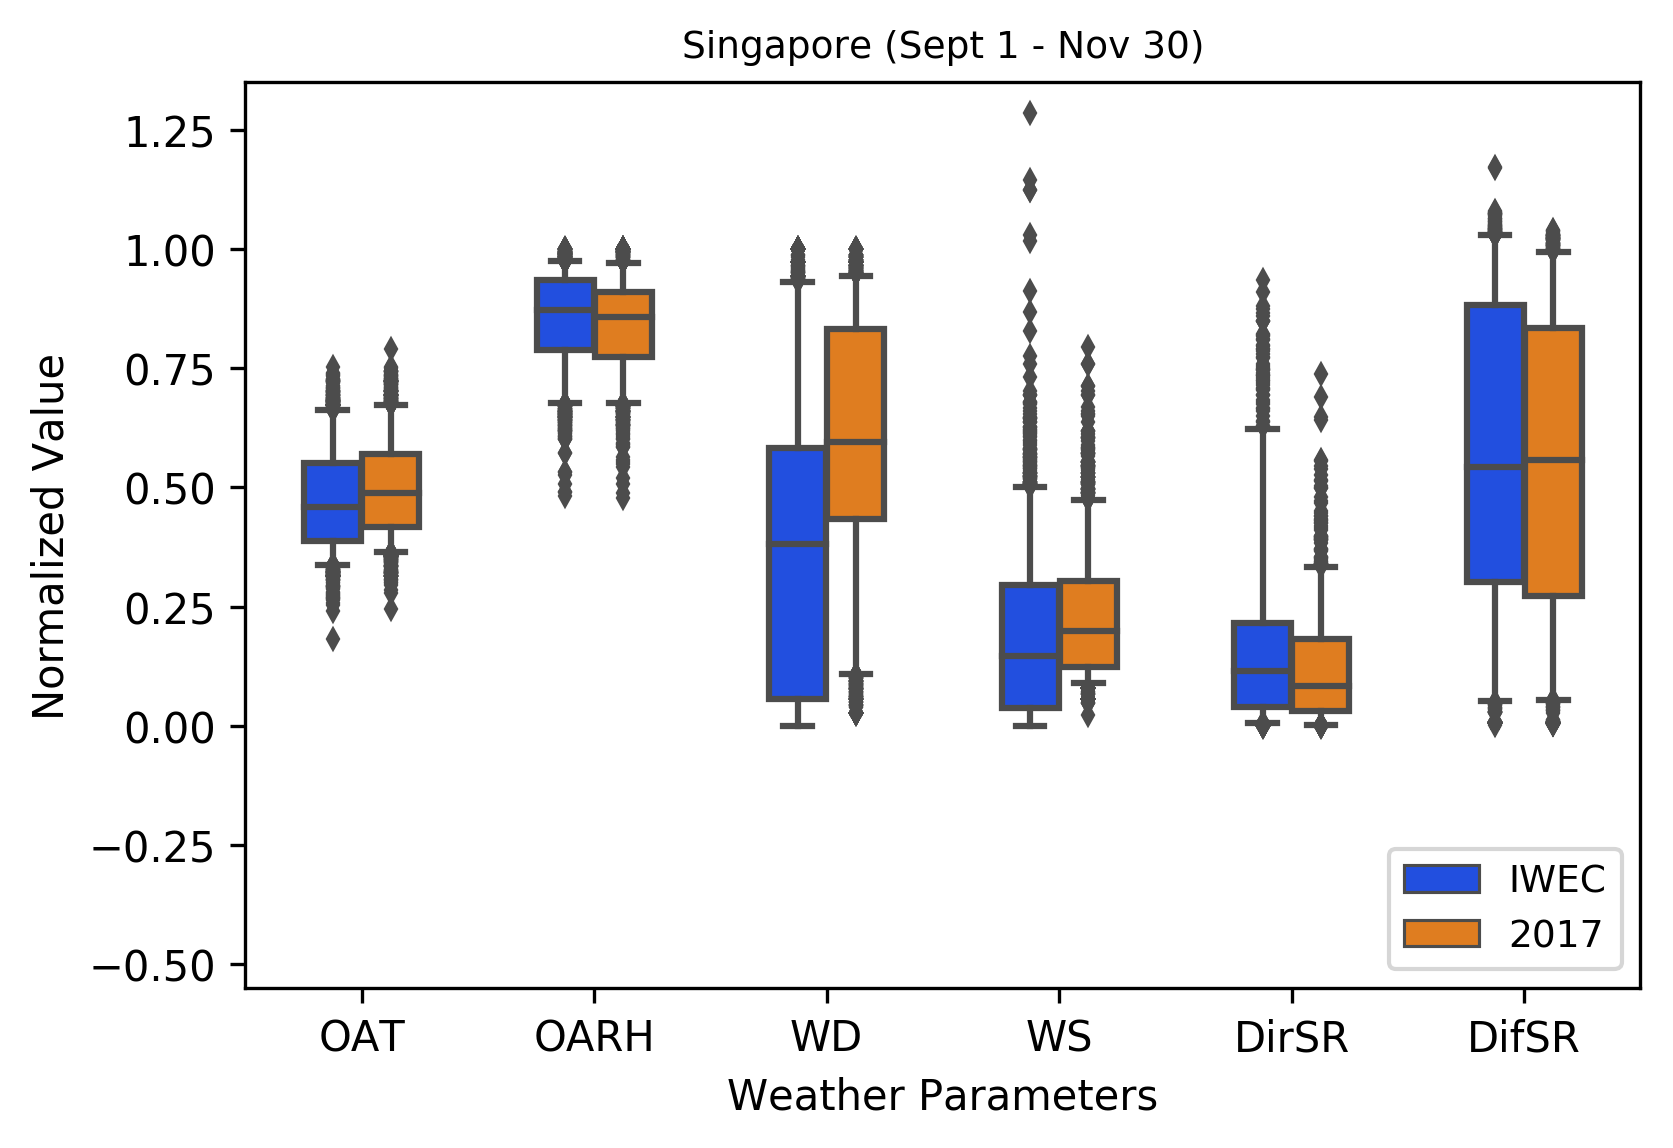

In [270]:
# Weather SG
fig = plt.figure(figsize=(6, 4))


In [17]:
model1_op_cmp = pd.read_csv('model1_operation_train_test_cmp.csv',
                             index_col = 0, skiprows = 5, header = 0, parse_dates = True)

In [18]:
model1_op_cmp

[1] Zone Thermostat Cooling Setpoint Temperature 2ND%FLOOR%SOUTH:2ND%OPEN%OFFICE%NE  \
Date/Time                                                                                                  
2002-06-01 00:10:00                                          28.210723                                     
2002-06-01 00:20:00                                          28.210723                                     
2002-06-01 00:30:00                                          28.210723                                     
2002-06-01 00:40:00                                          28.210723                                     
2002-06-01 00:50:00                                          28.210723                                     
2002-06-01 01:00:00                                          28.210723                                     
2002-06-01 01:10:00                                          27.795169                                     
2002-06-01 01:20:00                                          27.795169                                     
2002-06-01 01:30:00                                          27.795169                                     
2002-06-01 01:40:00                                          27.795169                                     
2002-06-01 01:50:00                                          27.795169                                     
2002-06-01 02:00:00                                          27.795169                                     
2002-06-01 02:10:00                                          28.619502                                     
2002-06-01 02:20:00                                          28.619502                                     
2002-06-01 02:30:00                                          28.619502                                     
2002-06-01 02:40:00                                          28.619502                                     
2002-06-01 02:50:00                                          28.619502                                     
2002-06-01 03:00:00                                          28.619502                                     
2002-06-01 03:10:00                                          27.840436                                     
2002-06-01 03:20:00                                          27.840436                                     
2002-06-01 03:30:00                                          27.840436                                     
2002-06-01 03:40:00                                          27.840436                                     
2002-06-01 03:50:00                                          27.840436                                     
2002-06-01 04:00:00                                          27.840436                                     
2002-06-01 04:10:00                                          27.663062                                     
2002-06-01 04:20:00                                          27.663062                                     
2002-06-01 04:30:00                                          27.663062                                     
2002-06-01 04:40:00                                          27.663062                                     
2002-06-01 04:50:00                                          27.663062                                     
2002-06-01 05:00:00                                          27.663062                                     
...                                                                ...                                     
2002-08-31 19:10:00                                          24.143186                                     
2002-08-31 19:20:00                                          24.143186                                     
2002-08-31 19:30:00                                          24.143186                                     
2002-08-31 19:40:00                                          24.143186                                     
2002-08-31 19:50:00      

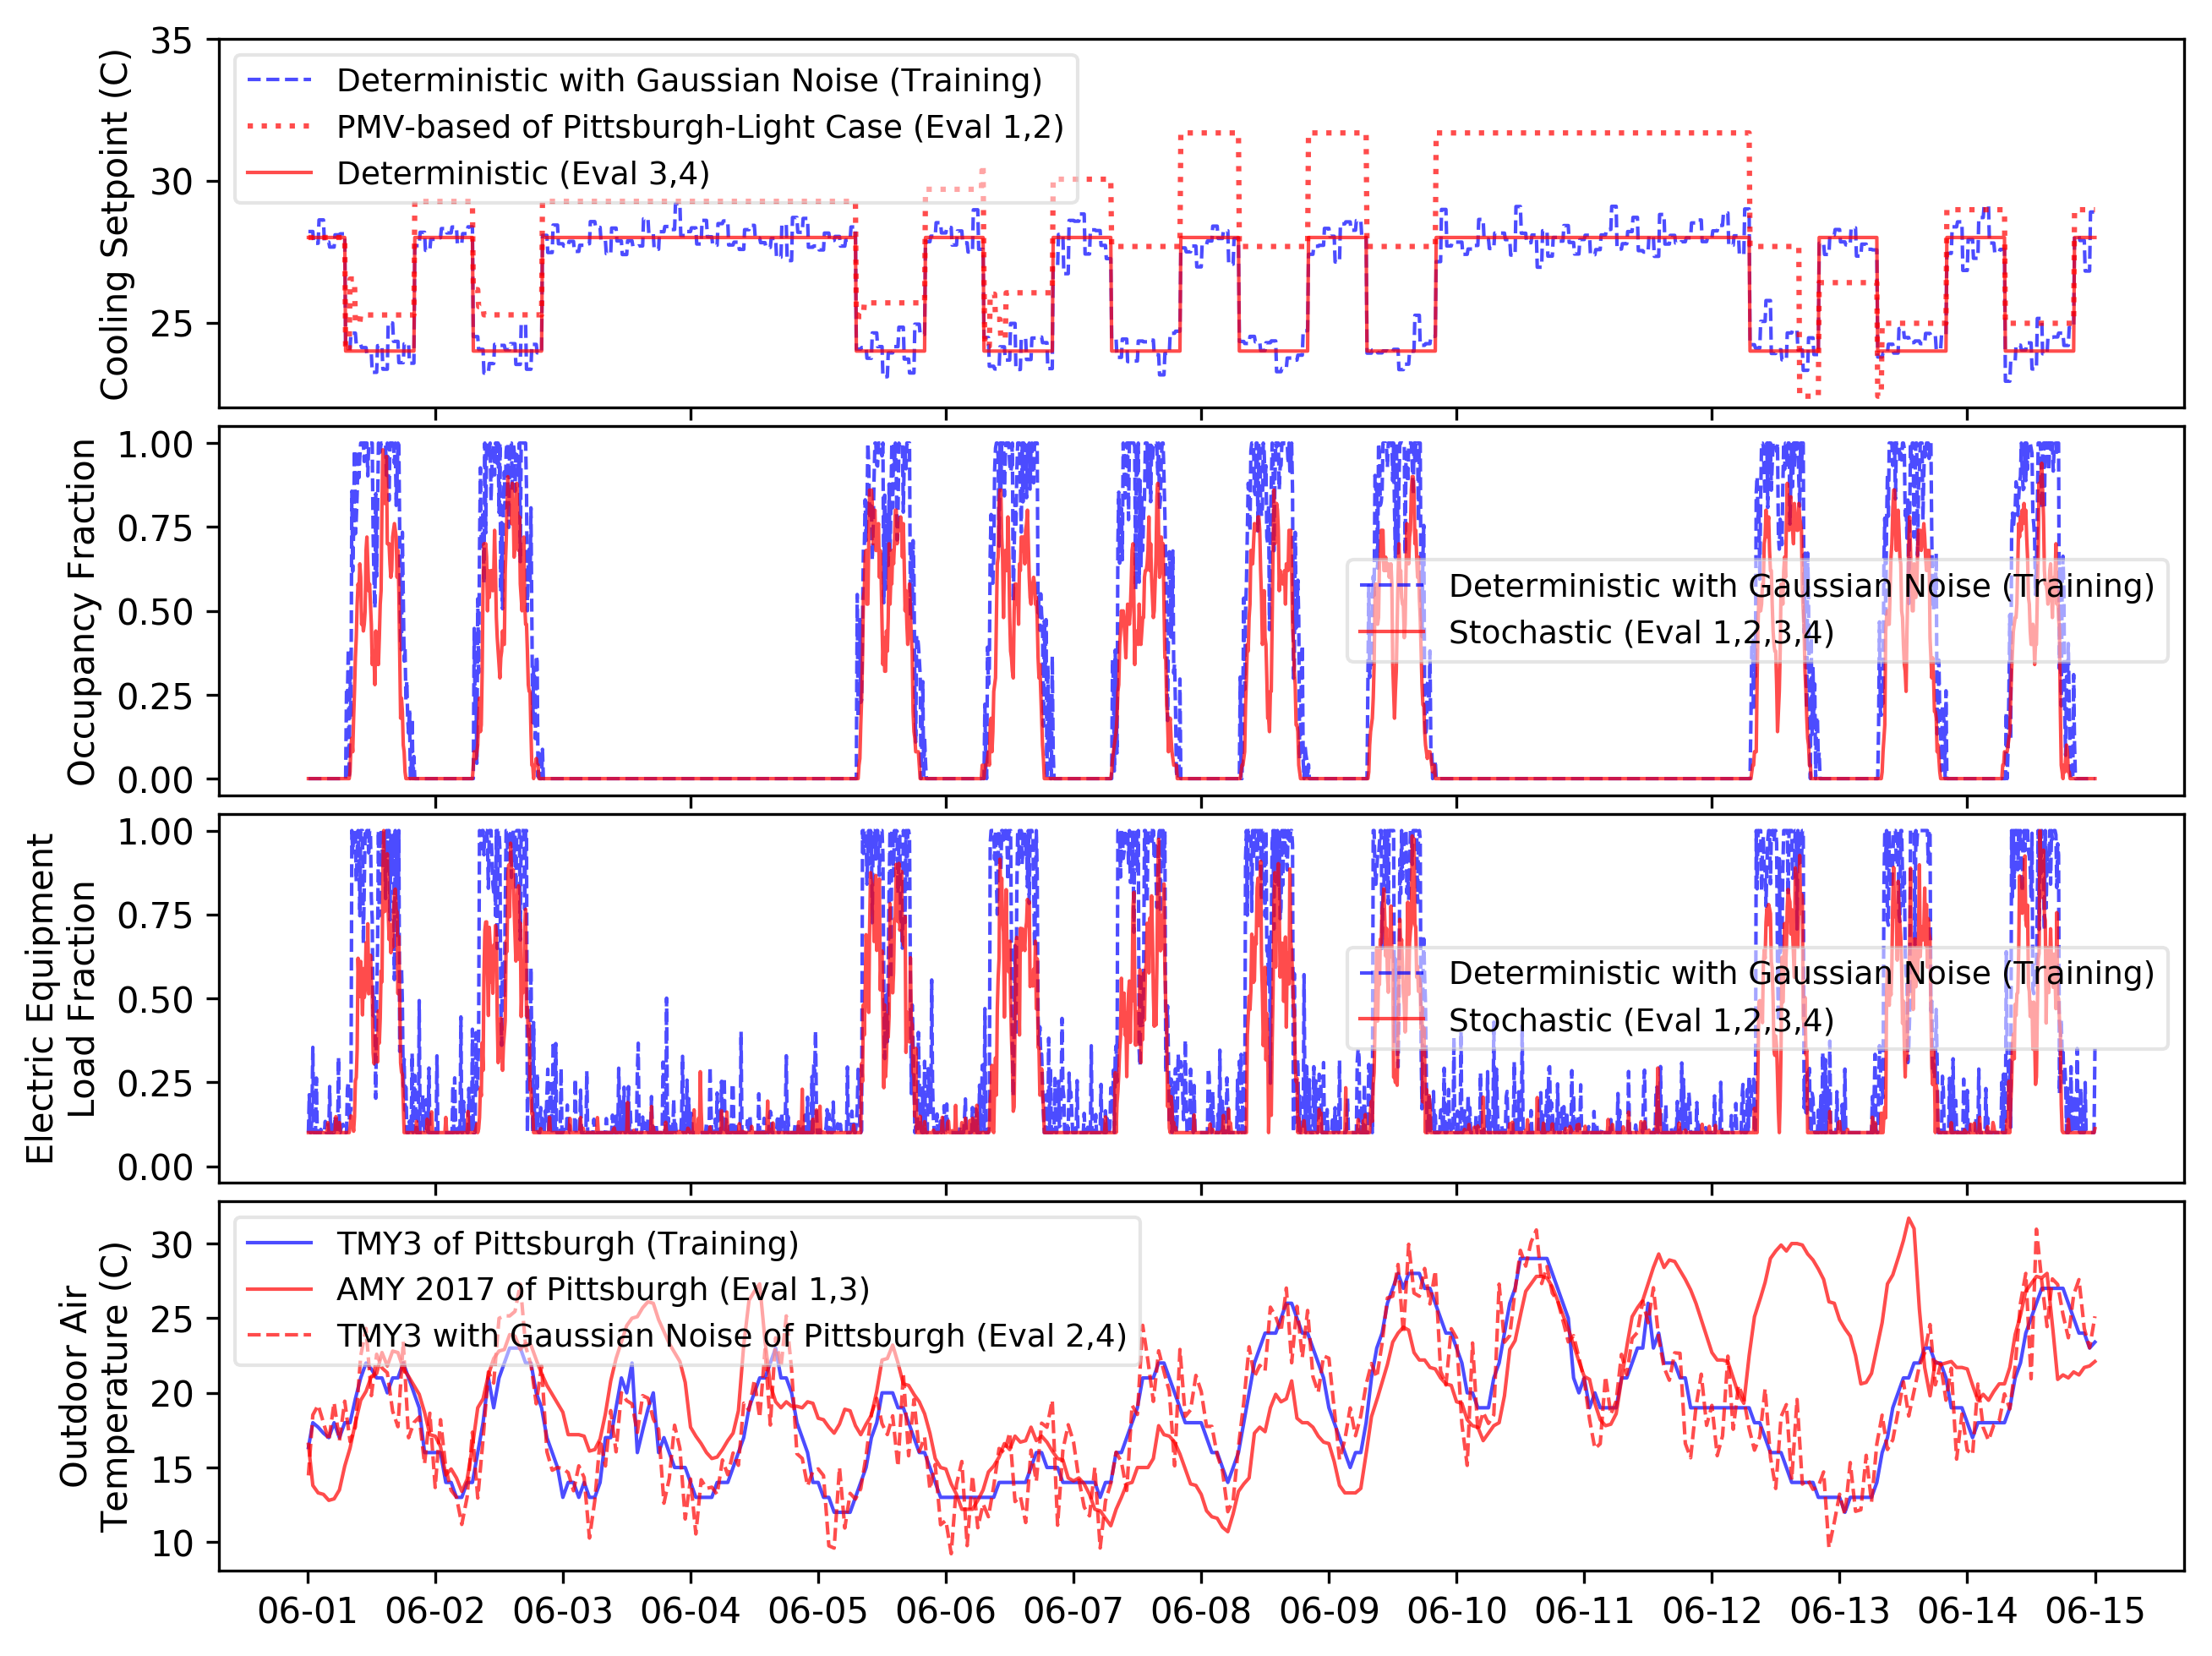

In [63]:
# Model1 cooling setpoint cmp
fig = plt.figure(figsize=(10, 8))
ax1 = plt.subplot2grid((4,1),(0,0))
ax2 = plt.subplot2grid((4,1),(1,0))
ax3 = plt.subplot2grid((4,1),(2,0))
ax4 = plt.subplot2grid((4,1),(3,0))
basetime = datetime.datetime.strptime('2012-06-01', '%Y-%m-%d').date()
x_plot = np.array([basetime + datetime.timedelta(days=i) for i in range(4032)])
yearsFmt = mdates.DateFormatter('%m-%d')
days = mdates.DayLocator(interval = 1)  # every month
# cooling stpt
ax1.plot(model1_op_cmp['[1] Zone Thermostat Cooling Setpoint Temperature 2ND%FLOOR%SOUTH:2ND%OPEN%OFFICE%NE'][0: 2016],
         color = 'blue', label = 'Deterministic with Gaussian Noise (Training)', linewidth = 1, alpha=0.7, linestyle='--')
ax1.plot(model1_op_cmp['[2] Zone Thermostat Cooling Setpoint Temperature 2ND%FLOOR%SOUTH:2ND%OPEN%OFFICE%NE'][0: 2016],linestyle=':', 
         color = 'red', label = 'PMV-based of Pittsburgh-Light Case (Eval 1,2)', linewidth = 1.5, alpha=0.7)
ax1.plot(model1_op_cmp['[3] Zone Thermostat Cooling Setpoint Temperature 2ND%FLOOR%SOUTH:2ND%OPEN%OFFICE%NE'][0: 2016],linestyle='-', 
         color = 'red', label = 'Deterministic (Eval 3,4)', linewidth = 1, alpha=0.7)
ax1.set_ylim(22, 35)
ax1.set_ylabel('Cooling Setpoint (C)', fontsize = 10)
ax1.legend(fontsize = 9, loc="upper left", framealpha=0.5)
plt.setp(ax1.get_xticklabels(),visible=False)

# people
ax2.plot(model1_op_cmp['[1] People Occupant Count () PEOPLE 1ST%FLOOR:1ST%RESEARCH%OPEN%NW'][0: 2016]/2,
         color = 'blue', label = 'Deterministic with Gaussian Noise (Training)', linewidth = 1, alpha=0.7, linestyle='--')
ax2.plot(model1_op_cmp['[2] People Occupant Count () PEOPLE 1ST%FLOOR:1ST%RESEARCH%OPEN%NW'][0: 2016]/3, linestyle='-',
         color = 'red', label = 'Stochastic (Eval 1,2,3,4)', linewidth = 1, alpha=0.7)

ax2.set_ylabel('Occupancy Fraction', fontsize = 10)
ax2.legend(fontsize = 9, loc="best",framealpha=0.5)
plt.setp(ax2.get_xticklabels(),visible=False)
# Model1 electric equipment sch cmp
ax3.plot(model1_op_cmp['[1] Zone Electric Equipment Electric Power (W) 1ST%FLOOR:1ST%RESEARCH%OPEN%NW'][0: 2016]/374.55,
         color = 'blue', label = 'Deterministic with Gaussian Noise (Training)', linewidth = 1, alpha=0.7, linestyle='--')
ax3.plot(model1_op_cmp['[2] Zone Electric Equipment Electric Power (W) 1ST%FLOOR:1ST%RESEARCH%OPEN%NW'][0: 2016]/374.55,linestyle='-', 
         color = 'red', label = 'Stochastic (Eval 1,2,3,4)', linewidth = 1, alpha=0.7)

ax3.set_ylabel('Electric Equipment\nLoad Fraction', fontsize = 10)
ax3.legend(fontsize = 9, loc="best",framealpha=0.5)
ax3.set_ylim(-0.05, 1.05)
plt.setp(ax3.get_xticklabels(),visible=False)
# oat
ax4.plot(model1_op_cmp['[1] Site Outdoor Air Drybulb Temperature (C)'][0: 2016],
         color = 'blue', label = 'TMY3 of Pittsburgh (Training)', linewidth = 1, alpha=0.7,linestyle='-')
ax4.plot(model1_op_cmp['[2] Site Outdoor Air Drybulb Temperature (C)'][0: 2016],linestyle='-',
         color = 'red', label = 'AMY 2017 of Pittsburgh (Eval 1,3)', linewidth = 1, alpha=0.7)
ax4.plot(model1_op_cmp['[4] Site Outdoor Air Drybulb Temperature (C)'][0: 2016],linestyle='--', 
         color = 'red', label = 'TMY3 with Gaussian Noise of Pittsburgh (Eval 2,4)', linewidth = 1, alpha=0.7)
ax4.set_ylabel('Outdoor Air\nTemperature (C)', fontsize = 10)
ax4.legend(fontsize = 9, loc="best", framealpha=0.5)
ax4.xaxis.set_major_formatter(yearsFmt)
ax4.xaxis.set_major_locator(days)
fig.subplots_adjust(hspace=0.05)

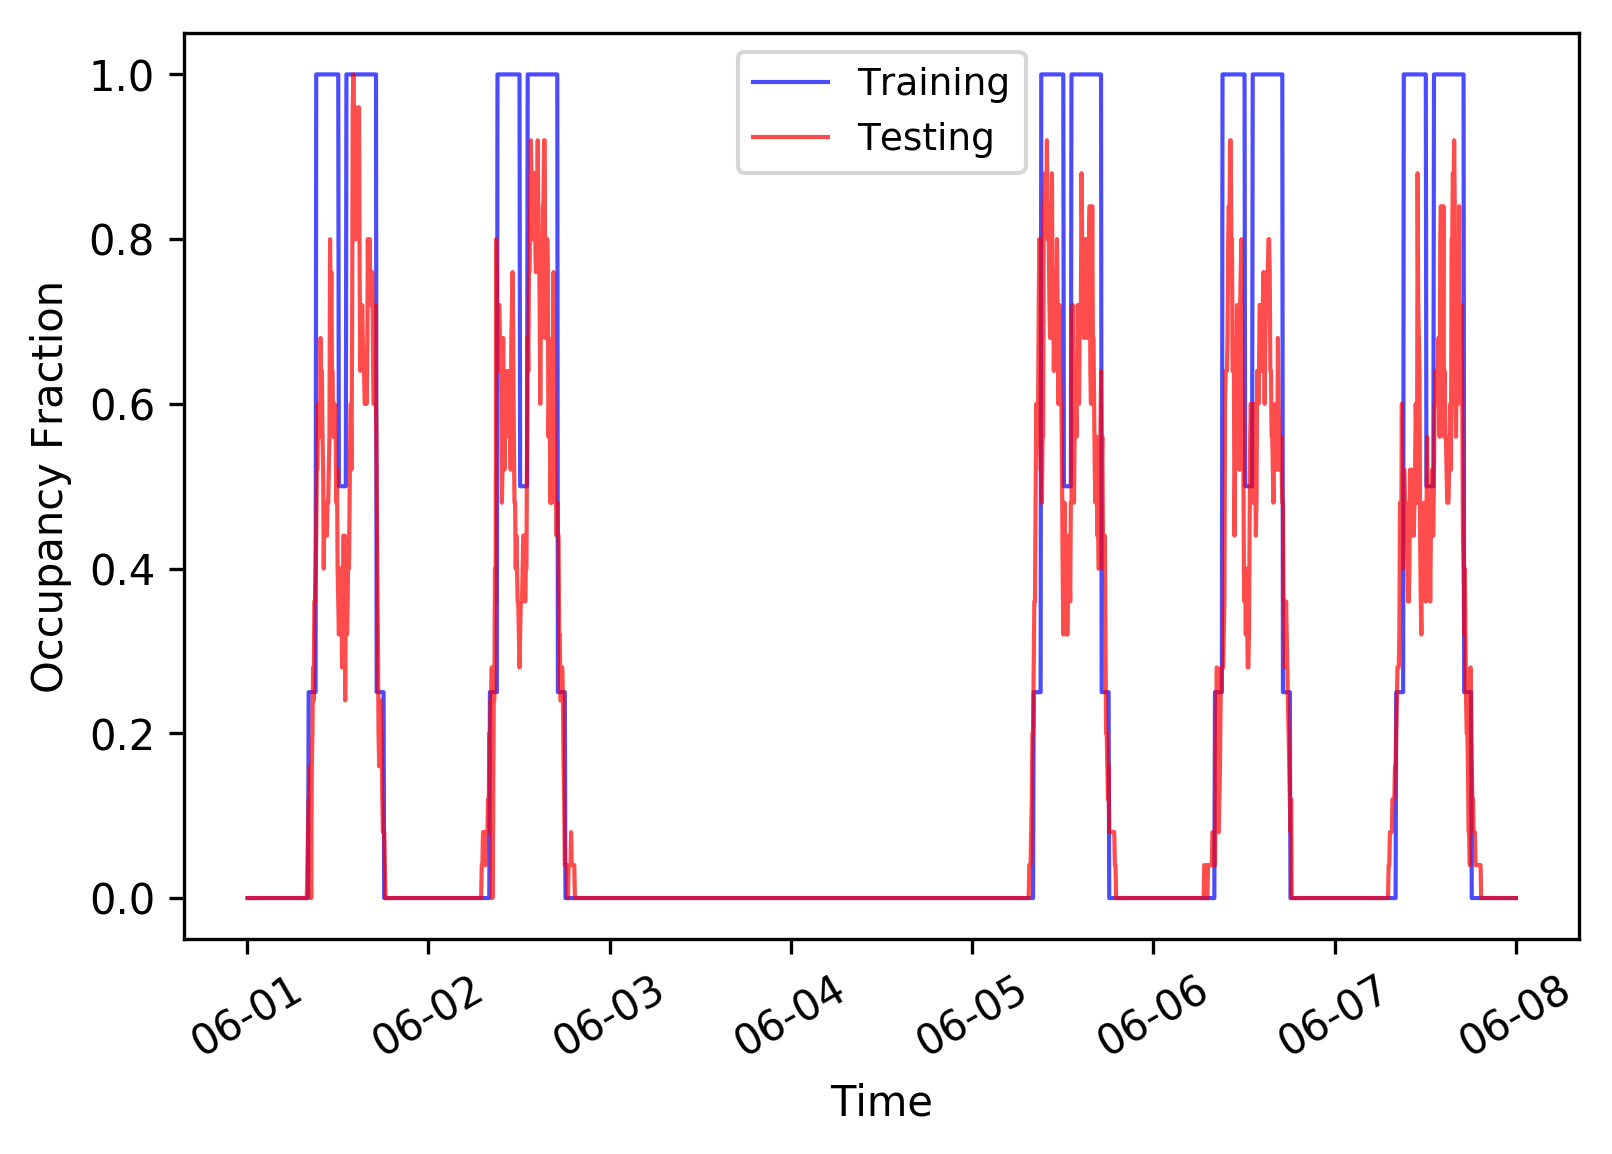

In [20]:
# Model1 occupancy sch cmp


(-0.05, 1.05)

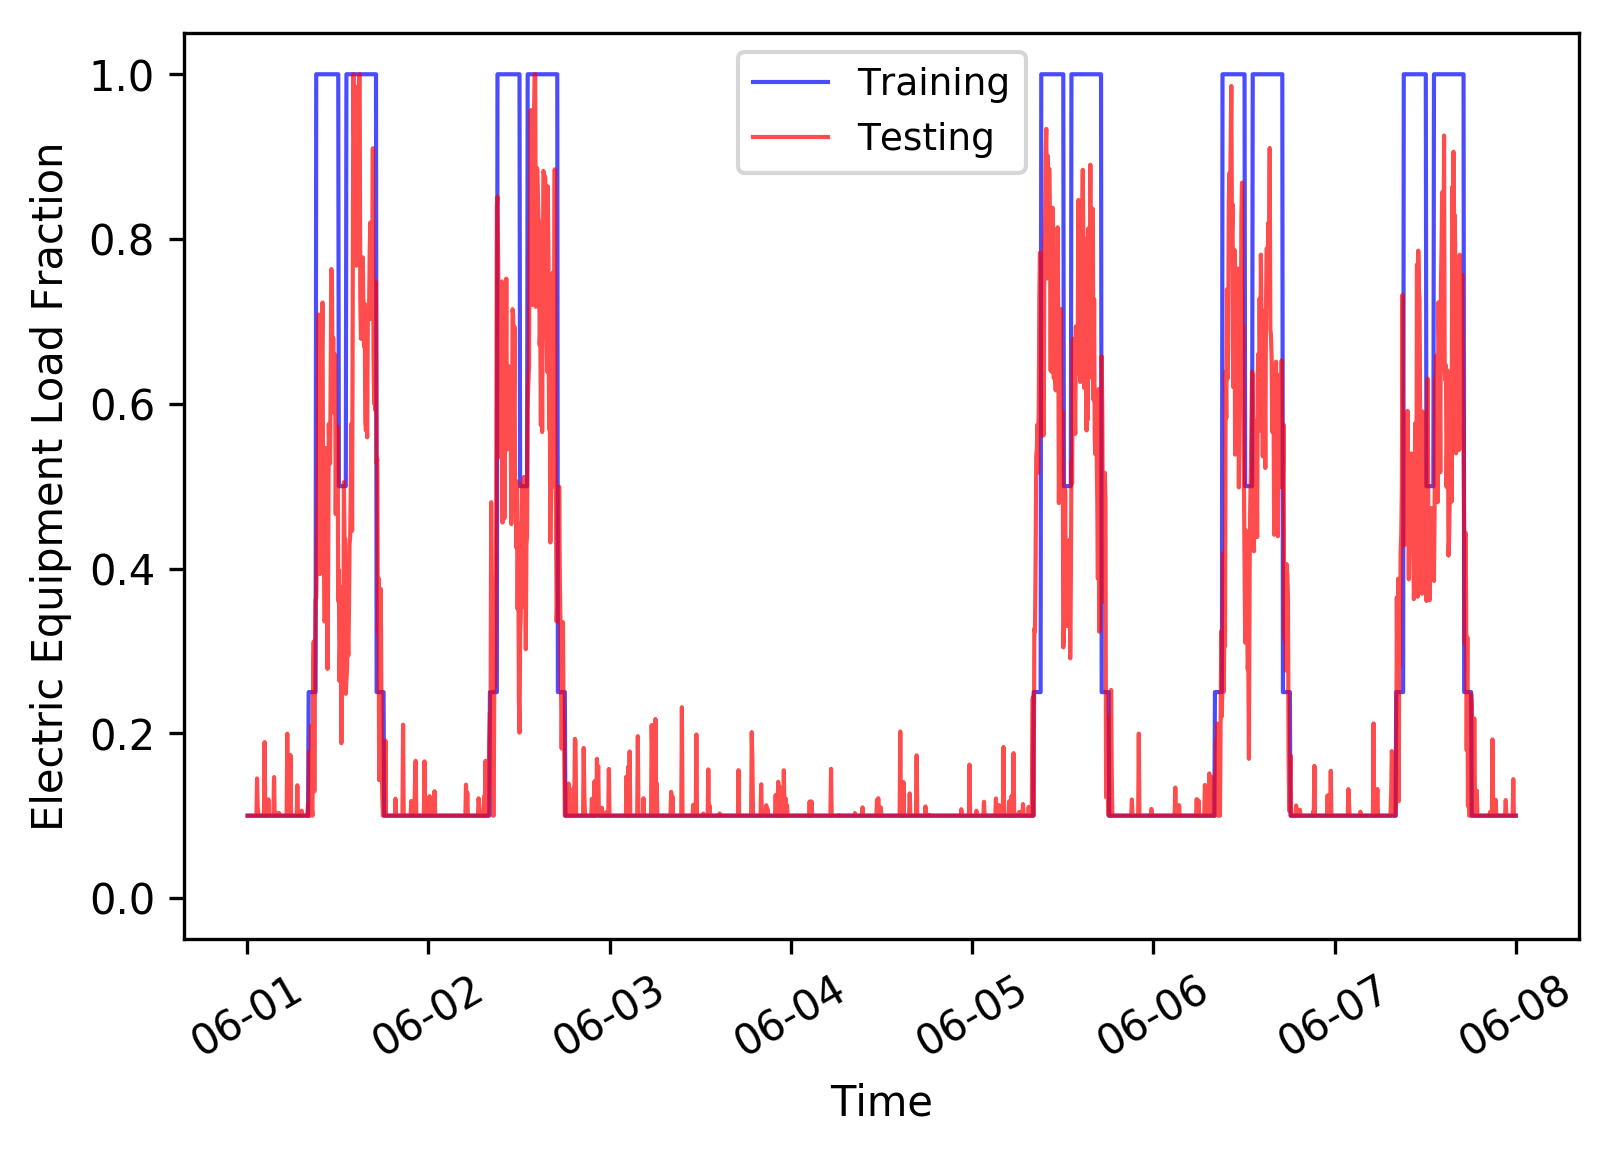

In [129]:
model3_op_cmp = pd.read_csv('cws_pit_demand_cmp.csv',
                             index_col = 0, skiprows = 2, header = 0, parse_dates = True)


In [133]:
def get_demand_cmp_reconstruct(demand_cmp_raw):
    demand_cmp_raw_reconstruct = [[],[]]
    column_names = ['training', 'testing1', 'testing2', 'testing3', 'testing4'];
    for column_name in column_names:
        values = demand_cmp_raw[column_name].values
        values = -values[~np.isnan(values)]/1000
        demand_cmp_raw_reconstruct[0].extend(values.tolist())
        demand_cmp_raw_reconstruct[1].extend([column_name for _ in range(len(values.tolist()))])

    demand_cmp_raw_reconstruct = np.array(demand_cmp_raw_reconstruct).T
    demand_cmp_raw_reconstruct = pd.DataFrame(demand_cmp_raw_reconstruct, columns = ['Cooling Demand (kW)', 'Simulator'])
    demand_cmp_raw_reconstruct[['Cooling Demand (kW)']] = demand_cmp_raw_reconstruct[['Cooling Demand (kW)']].apply(pd.to_numeric)
    return demand_cmp_raw_reconstruct

ValueError: Could not interpret input 'Value'

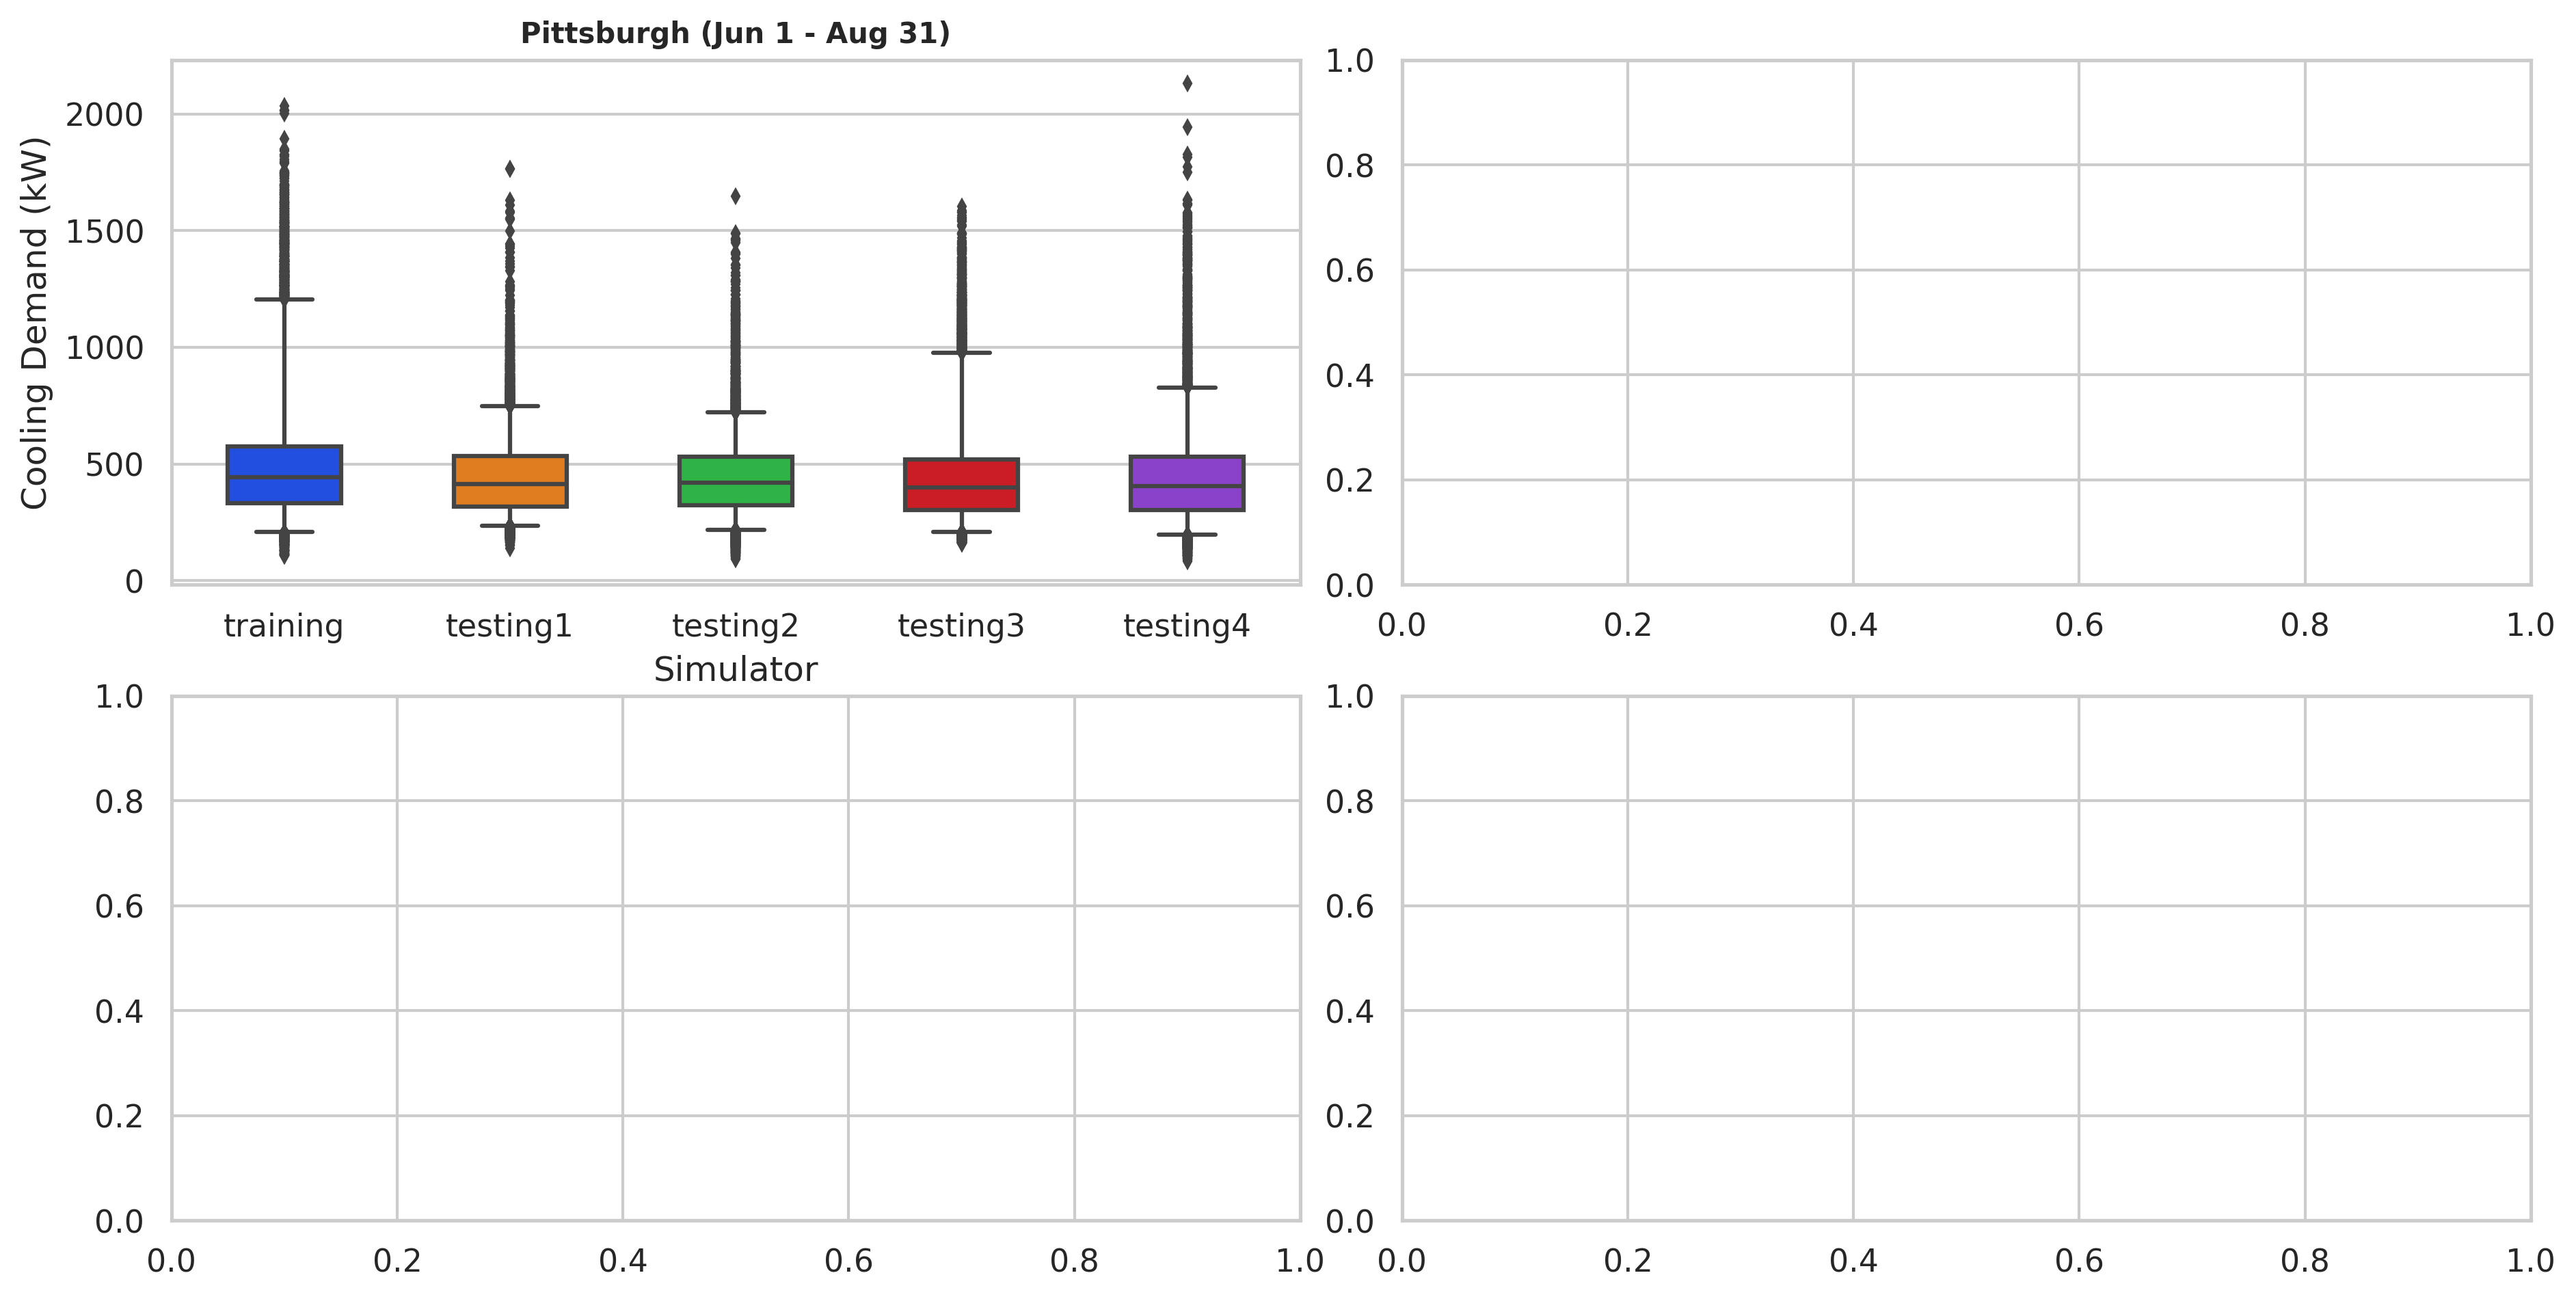

In [134]:
# cooling demand distribution
pit_demand_rec = get_demand_cmp_reconstruct(model3_op_cmp)


plt.figure(figsize=(12,6), facecolor='white')
ax1 = plt.subplot2grid((2, 2), (0, 0))
ax2 = plt.subplot2grid((2, 2), (1, 0))
ax3 = plt.subplot2grid((2, 2), (0, 1))
ax4 = plt.subplot2grid((2, 2), (1, 1))
plt.tight_layout(pad=0.0, w_pad=0.0, h_pad=1.2)
sns.set(font_scale=1.0)
sns.set_style("whitegrid")
# Weather Pit
sns.boxplot(x = 'Simulator', y = 'Cooling Demand (kW)', data = pit_demand_rec
            , palette = 'bright', width = 0.5, whis = [5, 95], fliersize = 3, ax = ax1)
ax1.set_title('Pittsburgh (Jun 1 - Aug 31)', fontsize = 10, fontweight='bold')

# Weather Bj
sns.boxplot(x = 'Simulator', y = 'Value', data = pit_demand_rec
            , palette = 'bright', width = 0.5, whis = [5, 95], fliersize = 3, ax = ax1)
ax2.set_title('Beijing (Jun 1 - Aug 31)', fontsize = 10, fontweight='bold')
ax2.set_ylim(-0.55, 1.35)
ax2.legend(loc = 'lower center')
# Weather Sh
sns.boxplot(x = 'Simulator', y = 'Value', data = pit_demand_rec
            , palette = 'bright', width = 0.5, whis = [5, 95], fliersize = 3, ax = ax1)
ax3.set_title('Shanghai (Jun 1 - Aug 31)', fontsize = 10, fontweight='bold')
ax3.set_ylim(-0.55, 1.35)
ax3.legend(loc = 'lower left')

# Weather Sg
sns.boxplot(x = 'Simulator', y = 'Value', data = pit_demand_rec
            , palette = 'bright', width = 0.5, whis = [5, 95], fliersize = 3, ax = ax1)
ax4.set_title('Singapore (Sept 1 - Nov 30)', fontsize = 10, fontweight='bold')
ax4.set_ylim(-0.55, 1.35)
ax4.legend(loc = 'lower left')
# Remove some axises
ax1.get_xaxis().get_label().set_visible(False)
ax3.get_xaxis().get_label().set_visible(False)
ax3.set_yticklabels([])
ax3.get_yaxis().get_label().set_visible(False)
ax4.set_yticklabels([])
ax4.get_yaxis().get_label().set_visible(False)
ax1.grid(False)
ax2.grid(False)
ax3.grid(False)
ax4.grid(False)

In [128]:
pit_demand_rec

NameError: name 'pit_demand_rec' is not defined

In [95]:
model1_pit_lightheavy_cmp = pd.read_csv('part1_pit_light_heavy_cmp.csv',
                             index_col = 0, skiprows = 3, header = 0, parse_dates = True)

In [96]:
model1_pit_lightheavy_cmp

[1] Zone Air Temperature (C)  \
Date/Time                                           
2002-06-01 00:10:00                     22.829881   
2002-06-01 00:20:00                     22.857206   
2002-06-01 00:30:00                     22.907560   
2002-06-01 00:40:00                     22.899511   
2002-06-01 00:50:00                     22.938487   
2002-06-01 01:00:00                     23.101172   
2002-06-01 01:10:00                     23.201333   
2002-06-01 01:20:00                     23.169771   
2002-06-01 01:30:00                     23.079148   
2002-06-01 01:40:00                     23.162209   
2002-06-01 01:50:00                     23.165348   
2002-06-01 02:00:00                     23.093740   
2002-06-01 02:10:00                     23.043531   
2002-06-01 02:20:00                     22.991952   
2002-06-01 02:30:00                     22.986577   
2002-06-01 02:40:00                     22.950409   
2002-06-01 02:50:00                     22.914233   
2002-06-01 03:00:00                     22.871225   
2002-06-01 03:10:00                     22.820638   
2002-06-01 03:20:00                     22.790503   
2002-06-01 03:30:00                     22.816308   
2002-06-01 03:40:00                     22.800750   
2002-06-01 03:50:00                     22.761877   
2002-06-01 04:00:00                     22.722225   
2002-06-01 04:10:00                     22.862579   
2002-06-01 04:20:00                     22.913999   
2002-06-01 04:30:00                     22.875594   
2002-06-01 04:40:00                     22.832952   
2002-06-01 04:50:00                     22.820851   
2002-06-01 05:00:00                     22.832868   
...                                           ...   
2002-08-31 19:10:00                     23.348717   
2002-08-31 19:20:00                     23.191035   
2002-08-31 19:30:00                     23.171425   
2002-08-31 19:40:00                     23.074844   
2002-08-31 19:50:00                     23.057440   
2002-08-31 20:00:00                     23.048591   
2002-08-31 20:10:00                     23.180152   
2002-08-31 20:20:00                     23.171410   
2002-08-31 20:30:00                     23.145161   
2002-08-31 20:40:00                     23.197042   
2002-08-31 20:50:00                     23.220177   
2002-08-31 21:00:00                     23.209085   
2002-08-31 21:10:00                     23.206321   
2002-08-31 21:20:00                     23.216239   
2002-08-31 21:30:00                     23.232306   
2002-08-31 21:40:00                     23.291655   
2002-08-31 21:50:00                     23.297337   
2002-08-31 22:00:00                     23.278037   
2002-08-31 22:10:00                     23.275758   
2002-08-31 22:20:00                     23.384109   
2002-08-31 22:30:00                     23.364128   
2002-08-31 22:40:00                     23.142080   
2002-08-31 22:50:00                     23.125479   
2002-08-31 23:00:00                     23.207800   
2002-08-31 23:10:00                     23.269153   
2002-08-31 23:20:00                     23.268752   
2002-08-31 23:30:00                     23.218276   
2002-08-31 23:40:00                     23.167813   
2002-08-31 23:50:00                     23.152880   
2002-09-01 00:00:00                     23.125723   

                     [2] Zone Air Temperature (C)  
Date/Time                                          
2002-06-01 00:10:00                     23.046098  
2002-06-01 00:20:00                     23.080141  
2002-06-01 00:30:00                     23.135771  
2002-06-01 00:40:00                     23.133434  
2002-06-01 00:50:00                     23.177830  
2002-06-01 01:00:00                     23.341918  
2002-06-01 01:10:00                     23.265115  
2002-06-01 01:20:00                     23.133113  
2002-06-01 01:30:00                     22.941629  
2002-06-01 01:40:00                     23.047954  
2002-06-01 01:50:00                     23.062376  
2002-

Text(0.5,1,'Indoor Air Temperature Response of VAVCooling-Pittsburgh Training Simulators\nusing the Baseline Control Strategy')

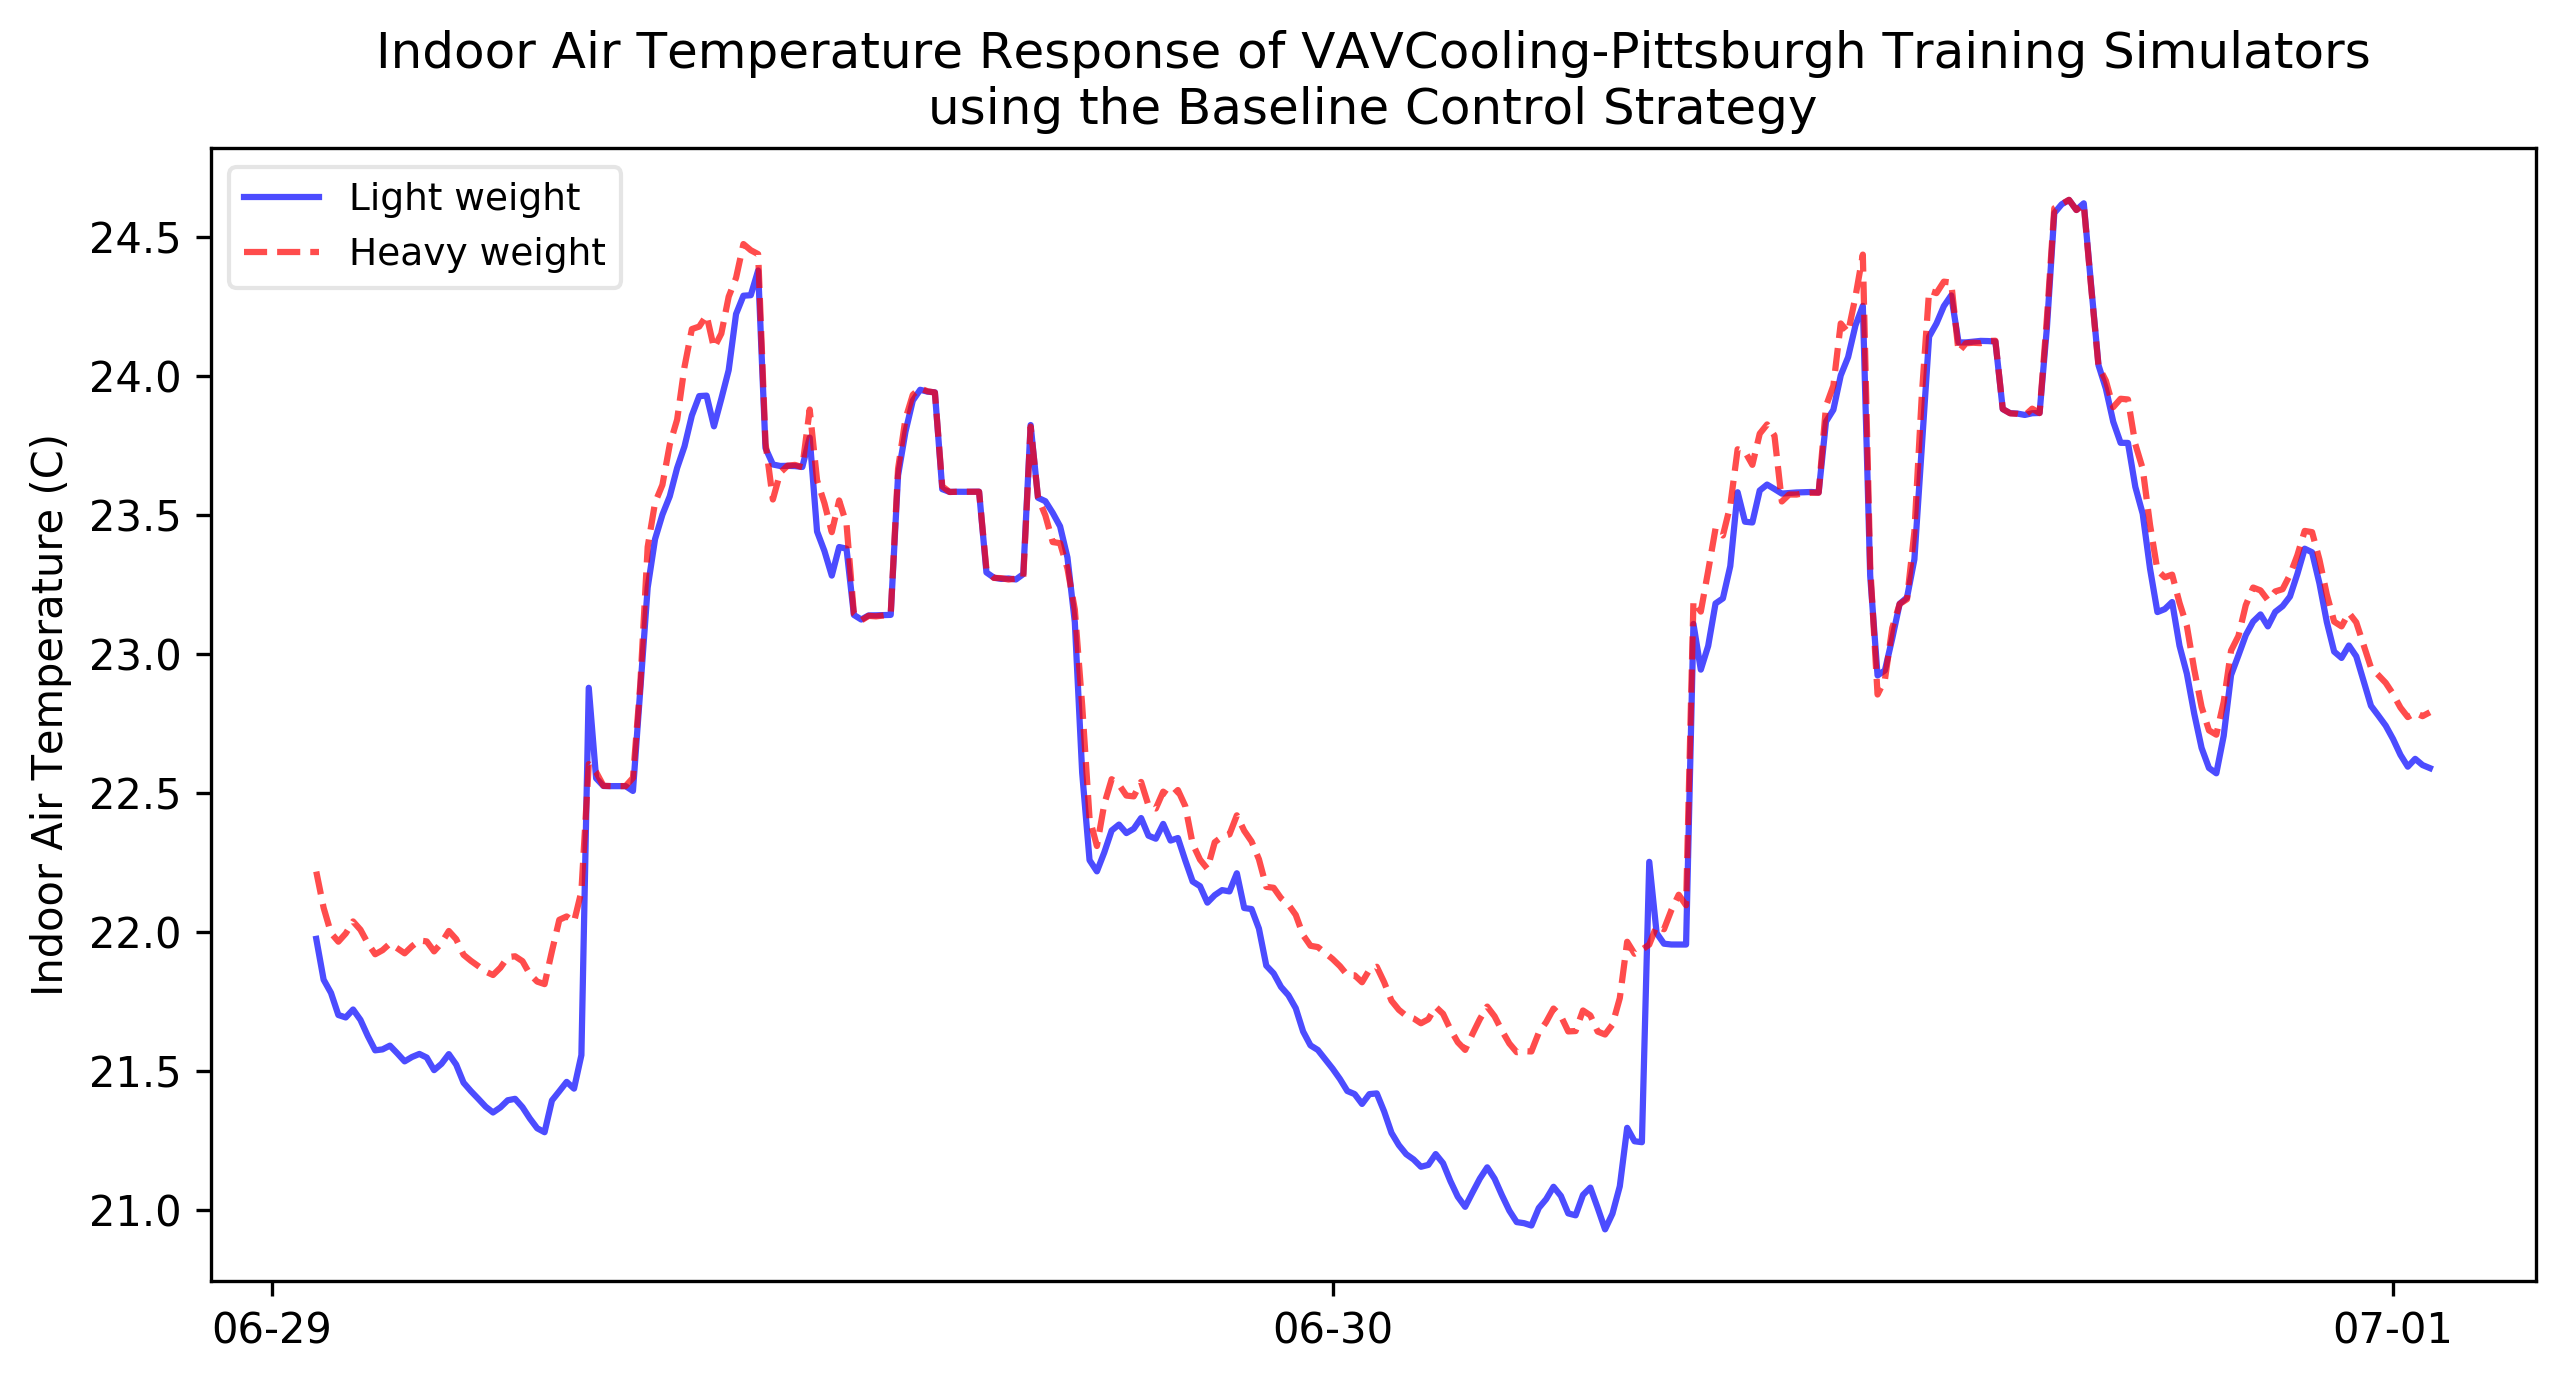

In [101]:
# Model1 light heavy cmp
fig = plt.figure(figsize=(10, 5))
ax1 = plt.subplot2grid((1,1),(0,0))
basetime = datetime.datetime.strptime('2012-06-01', '%Y-%m-%d').date()
x_plot = np.array([basetime + datetime.timedelta(days=i) for i in range(4032)])
yearsFmt = mdates.DateFormatter('%m-%d')
days = mdates.DayLocator(interval = 1)  # every month
# eval 1 2
ax1.plot(model1_pit_lightheavy_cmp['[1] Zone Air Temperature (C)'][4037: 4325],
         color = 'blue', label = 'Light weight', linewidth = 1.5, alpha=0.7, linestyle='-')
ax1.plot(model1_pit_lightheavy_cmp['[2] Zone Air Temperature (C)'][4037: 4325],linestyle='--', 
         color = 'r', label = 'Heavy weight', linewidth = 1.5, alpha=0.7)
ax1.set_ylabel('Indoor Air Temperature (C)', fontsize = 10)
ax1.legend(fontsize = 9, loc="upper left", framealpha=0.5)
ax1.xaxis.set_major_formatter(yearsFmt)
ax1.xaxis.set_major_locator(days)
plt.title('Indoor Air Temperature Response of VAVCooling-Pittsburgh Training Simulators\nusing the Baseline Control Strategy')

In [81]:
model4_pit_dcor_cmp = np.loadtxt('./state_correlation_test/1.1mp.cws.pittsburgh.sys.train.dcor.csv',delimiter=',')
model4_bej_dcor_cmp = np.loadtxt('./state_correlation_test/2.1mp.cws.beijing.sys.train.dcor.csv',delimiter=',')
model4_shg_dcor_cmp = np.loadtxt('./state_correlation_test/3.1mp.cws.shanghai.sys.train.dcor.csv',delimiter=',')
model4_sgp_dcor_cmp = np.loadtxt('./state_correlation_test/4.1mp.cws.singapore.sys.train.dcor.csv',delimiter=',')

array([[0.82727436, 0.82320882],
       [0.80162535, 0.80531718],
       [0.78731715, 0.79317157],
       [0.77030775, 0.77907629],
       [0.75517503, 0.76636326],
       [0.74140102, 0.75542406],
       [0.72405939, 0.74207332],
       [0.71582937, 0.73490401],
       [0.70579477, 0.72596714],
       [0.69565992, 0.71787548],
       [0.68966527, 0.71340222],
       [0.68412464, 0.7080523 ],
       [0.6712754 , 0.69664725],
       [0.66477355, 0.69148581],
       [0.65461952, 0.68135124],
       [0.64612793, 0.67425317],
       [0.63930367, 0.66848999],
       [0.63231985, 0.66212204],
       [0.62601552, 0.65692609],
       [0.61787262, 0.65019887],
       [0.6120599 , 0.64515943],
       [0.60330047, 0.63655498],
       [0.59867976, 0.63284472],
       [0.58697122, 0.62269029],
       [0.57753298, 0.61555291],
       [0.56949224, 0.60917801],
       [0.56149846, 0.60149715],
       [0.55325284, 0.59524063],
       [0.54491932, 0.58853448],
       [0.53694069, 0.58045786],
       [0.

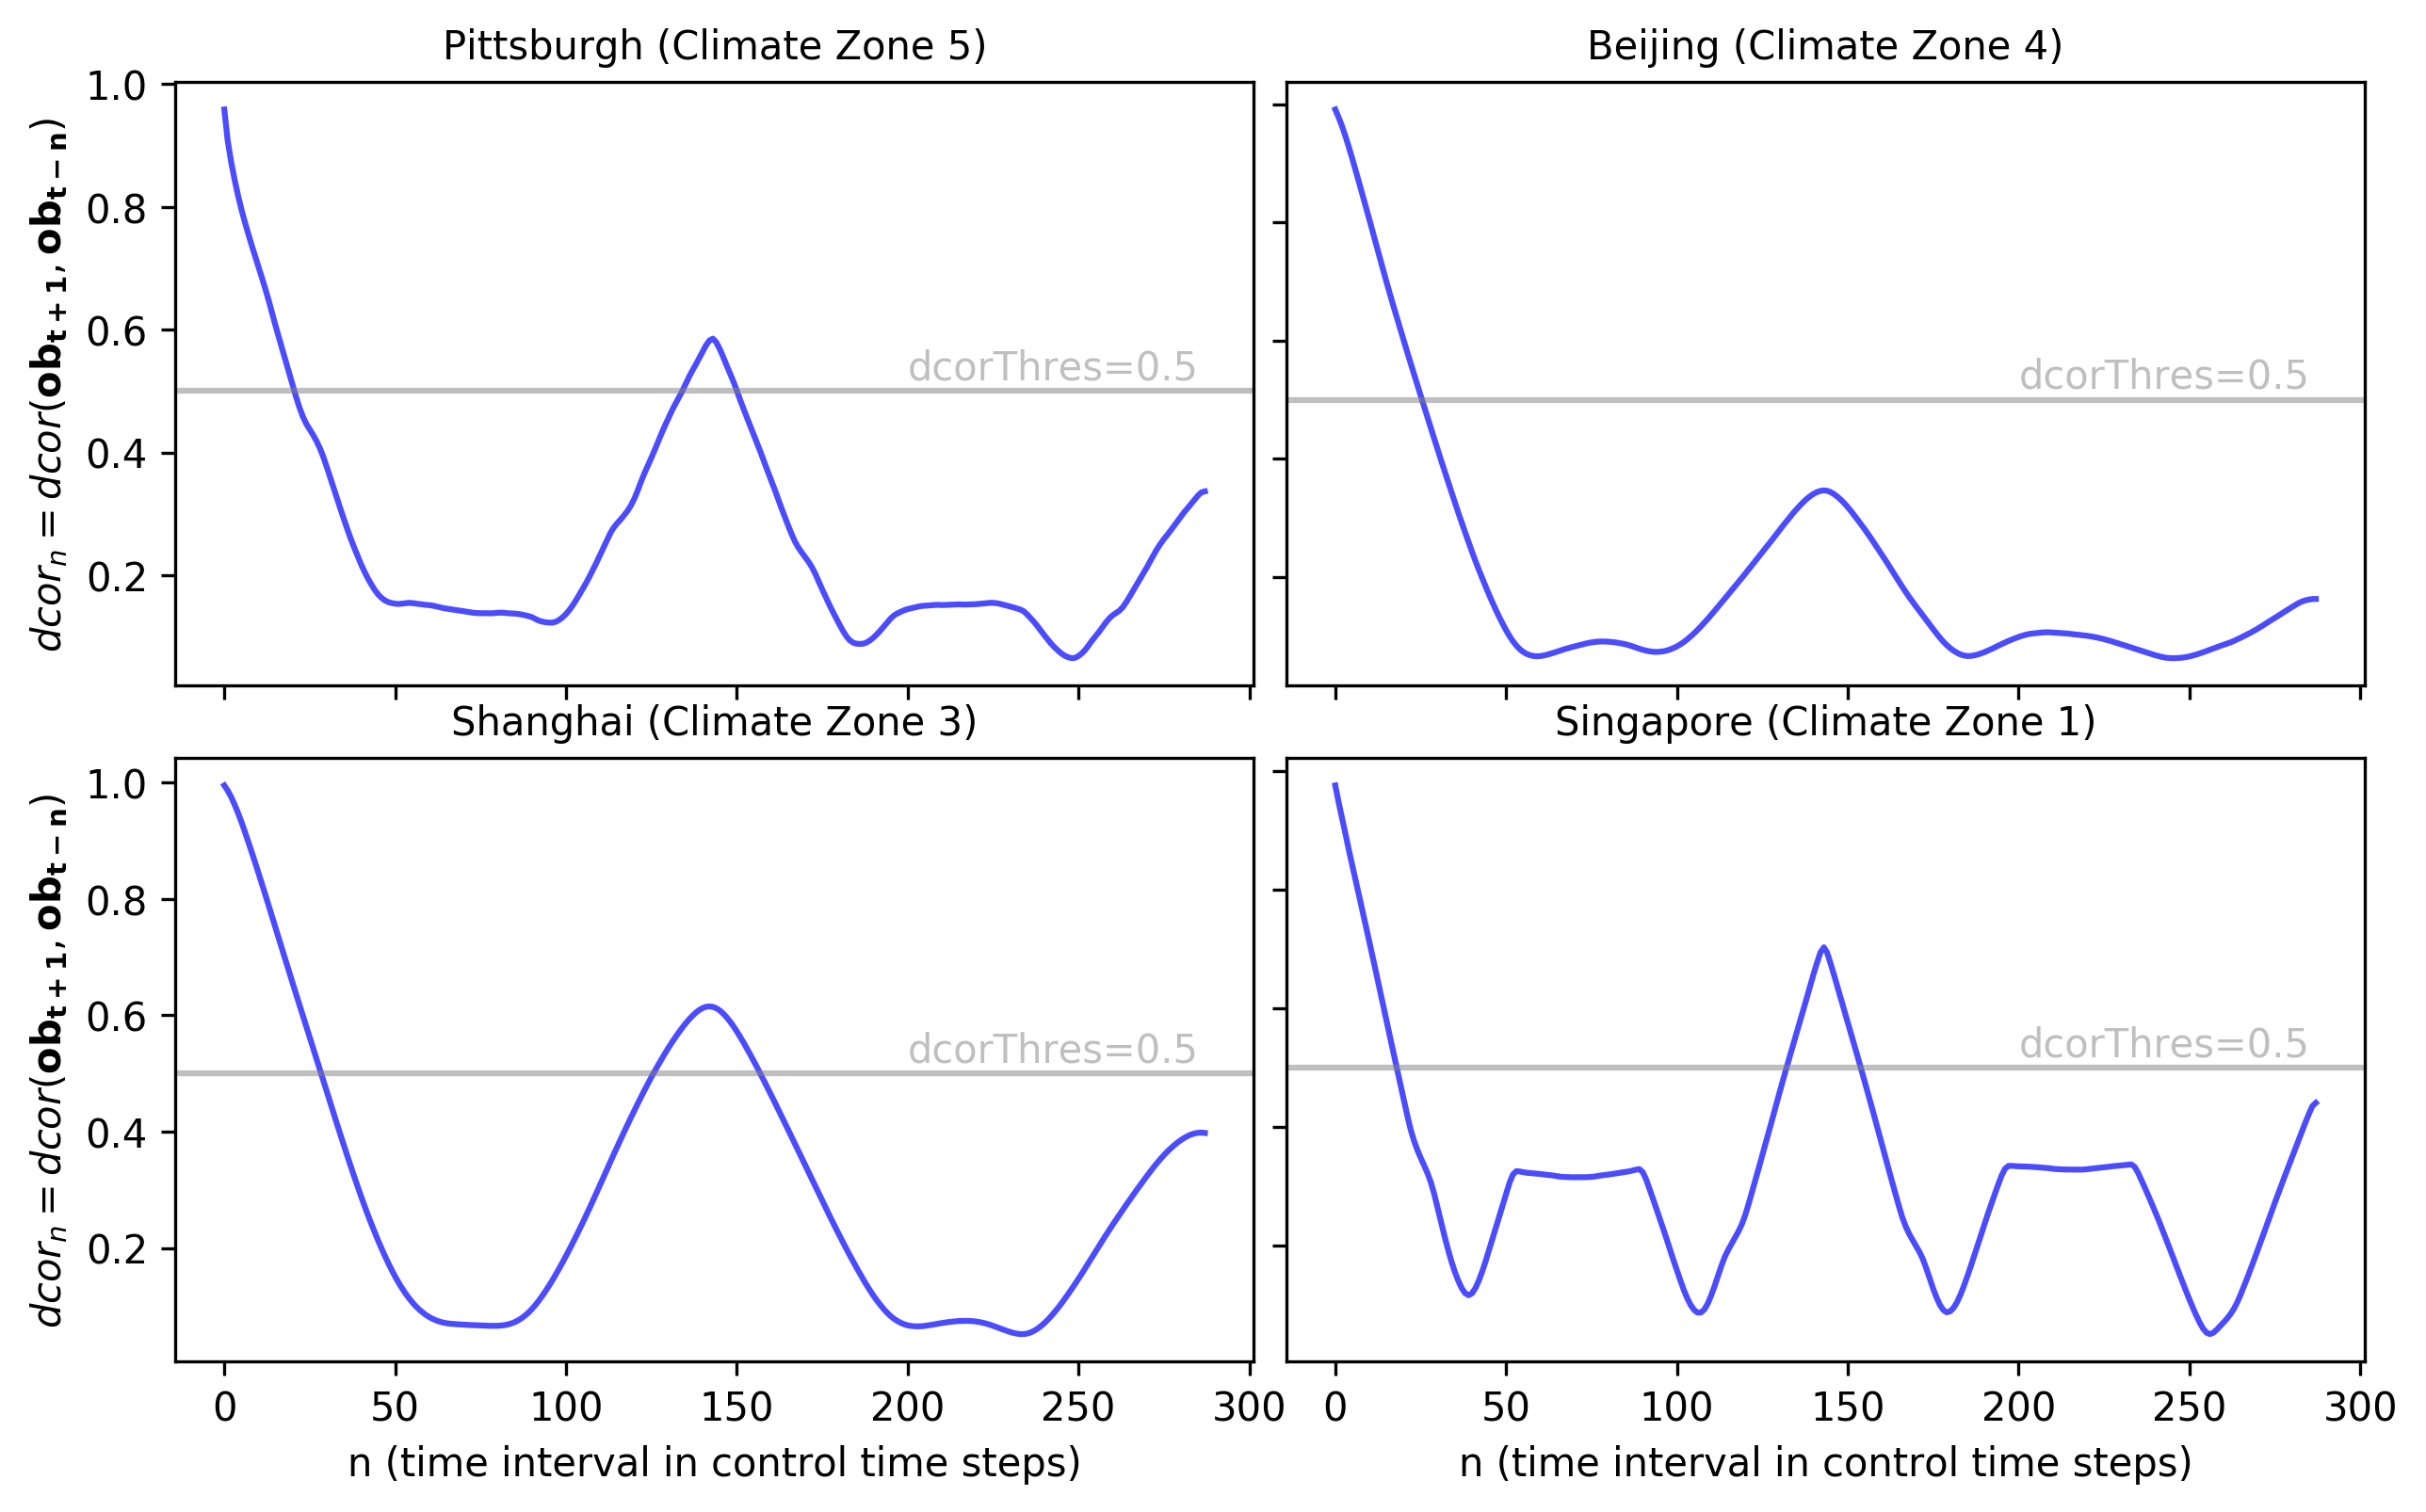

In [115]:
# Model1 light heavy dcor cmp
fig = plt.figure(figsize=(10,6))
ax1 = plt.subplot2grid((2,2),(0,0))
ax2 = plt.subplot2grid((2,2),(0,1))
ax3 = plt.subplot2grid((2,2),(1,0))
ax4 = plt.subplot2grid((2,2),(1,1))

ax1.plot(model4_pit_dcor_cmp[0:288],
         color = 'blue', label = 'Light weight', linewidth = 1.5, alpha=0.7, linestyle='-')
ax2.plot(model4_bej_dcor_cmp[0:288],
         color = 'blue', label = 'Light weight', linewidth = 1.5, alpha=0.7, linestyle='-')
ax3.plot(model4_shg_dcor_cmp[0:288],
         color = 'blue', label = 'Light weight', linewidth = 1.5, alpha=0.7, linestyle='-')
ax4.plot(model4_sgp_dcor_cmp[0:288],
         color = 'blue', label = 'Light weight', linewidth = 1.5, alpha=0.7, linestyle='-')

ax1.set_ylabel(r'$dcor_n=dcor(\mathbf{ob_{t+1}}, \mathbf{ob_{t-n}})$', fontsize = 10)
ax1.xaxis.set_ticklabels([])
ax1.axhline(0.5, c='grey', alpha=0.5)
ax1.text(200, 0.52, 'dcorThres=0.5', color='grey', alpha=0.5)
ax1.set_title('Pittsburgh (Climate Zone 5)', fontsize=10)

ax2.yaxis.set_ticklabels([])
ax2.xaxis.set_ticklabels([])
ax2.axhline(0.5, c='grey', alpha=0.5)
ax2.text(200, 0.52, 'dcorThres=0.5', color='grey', alpha=0.5)
ax2.set_title('Beijing (Climate Zone 4)', fontsize=10)

ax3.set_ylabel(r'$dcor_n=dcor(\mathbf{ob_{t+1}}, \mathbf{ob_{t-n}})$', fontsize = 10)
ax3.axhline(0.5, c='grey', alpha=0.5)
ax3.text(200, 0.52, 'dcorThres=0.5', color='grey', alpha=0.5)
ax3.set_title('Shanghai (Climate Zone 3)', fontsize=10)
ax3.set_xlabel('n (time interval in control time steps)')

ax4.yaxis.set_ticklabels([])
ax4.axhline(0.5, c='grey', alpha=0.5)
ax4.text(200, 0.52, 'dcorThres=0.5', color='grey', alpha=0.5)
ax4.set_title('Singapore (Climate Zone 1)', fontsize=10)
ax4.set_xlabel('n (time interval in control time steps)')

plt.subplots_adjust(hspace=0.12, wspace=0.03)


In [7]:
model2_pit_lightheavy_cmp = pd.read_csv('part2_pit_light_heavy_cmp.csv',
                             index_col = 0, skiprows = 3, header = 0, parse_dates = True)

Text(0.5,1,'Indoor Air Temperature Response of VAVHeating-Pittsburgh Training Simulators\nusing the Baseline Control Strategy')

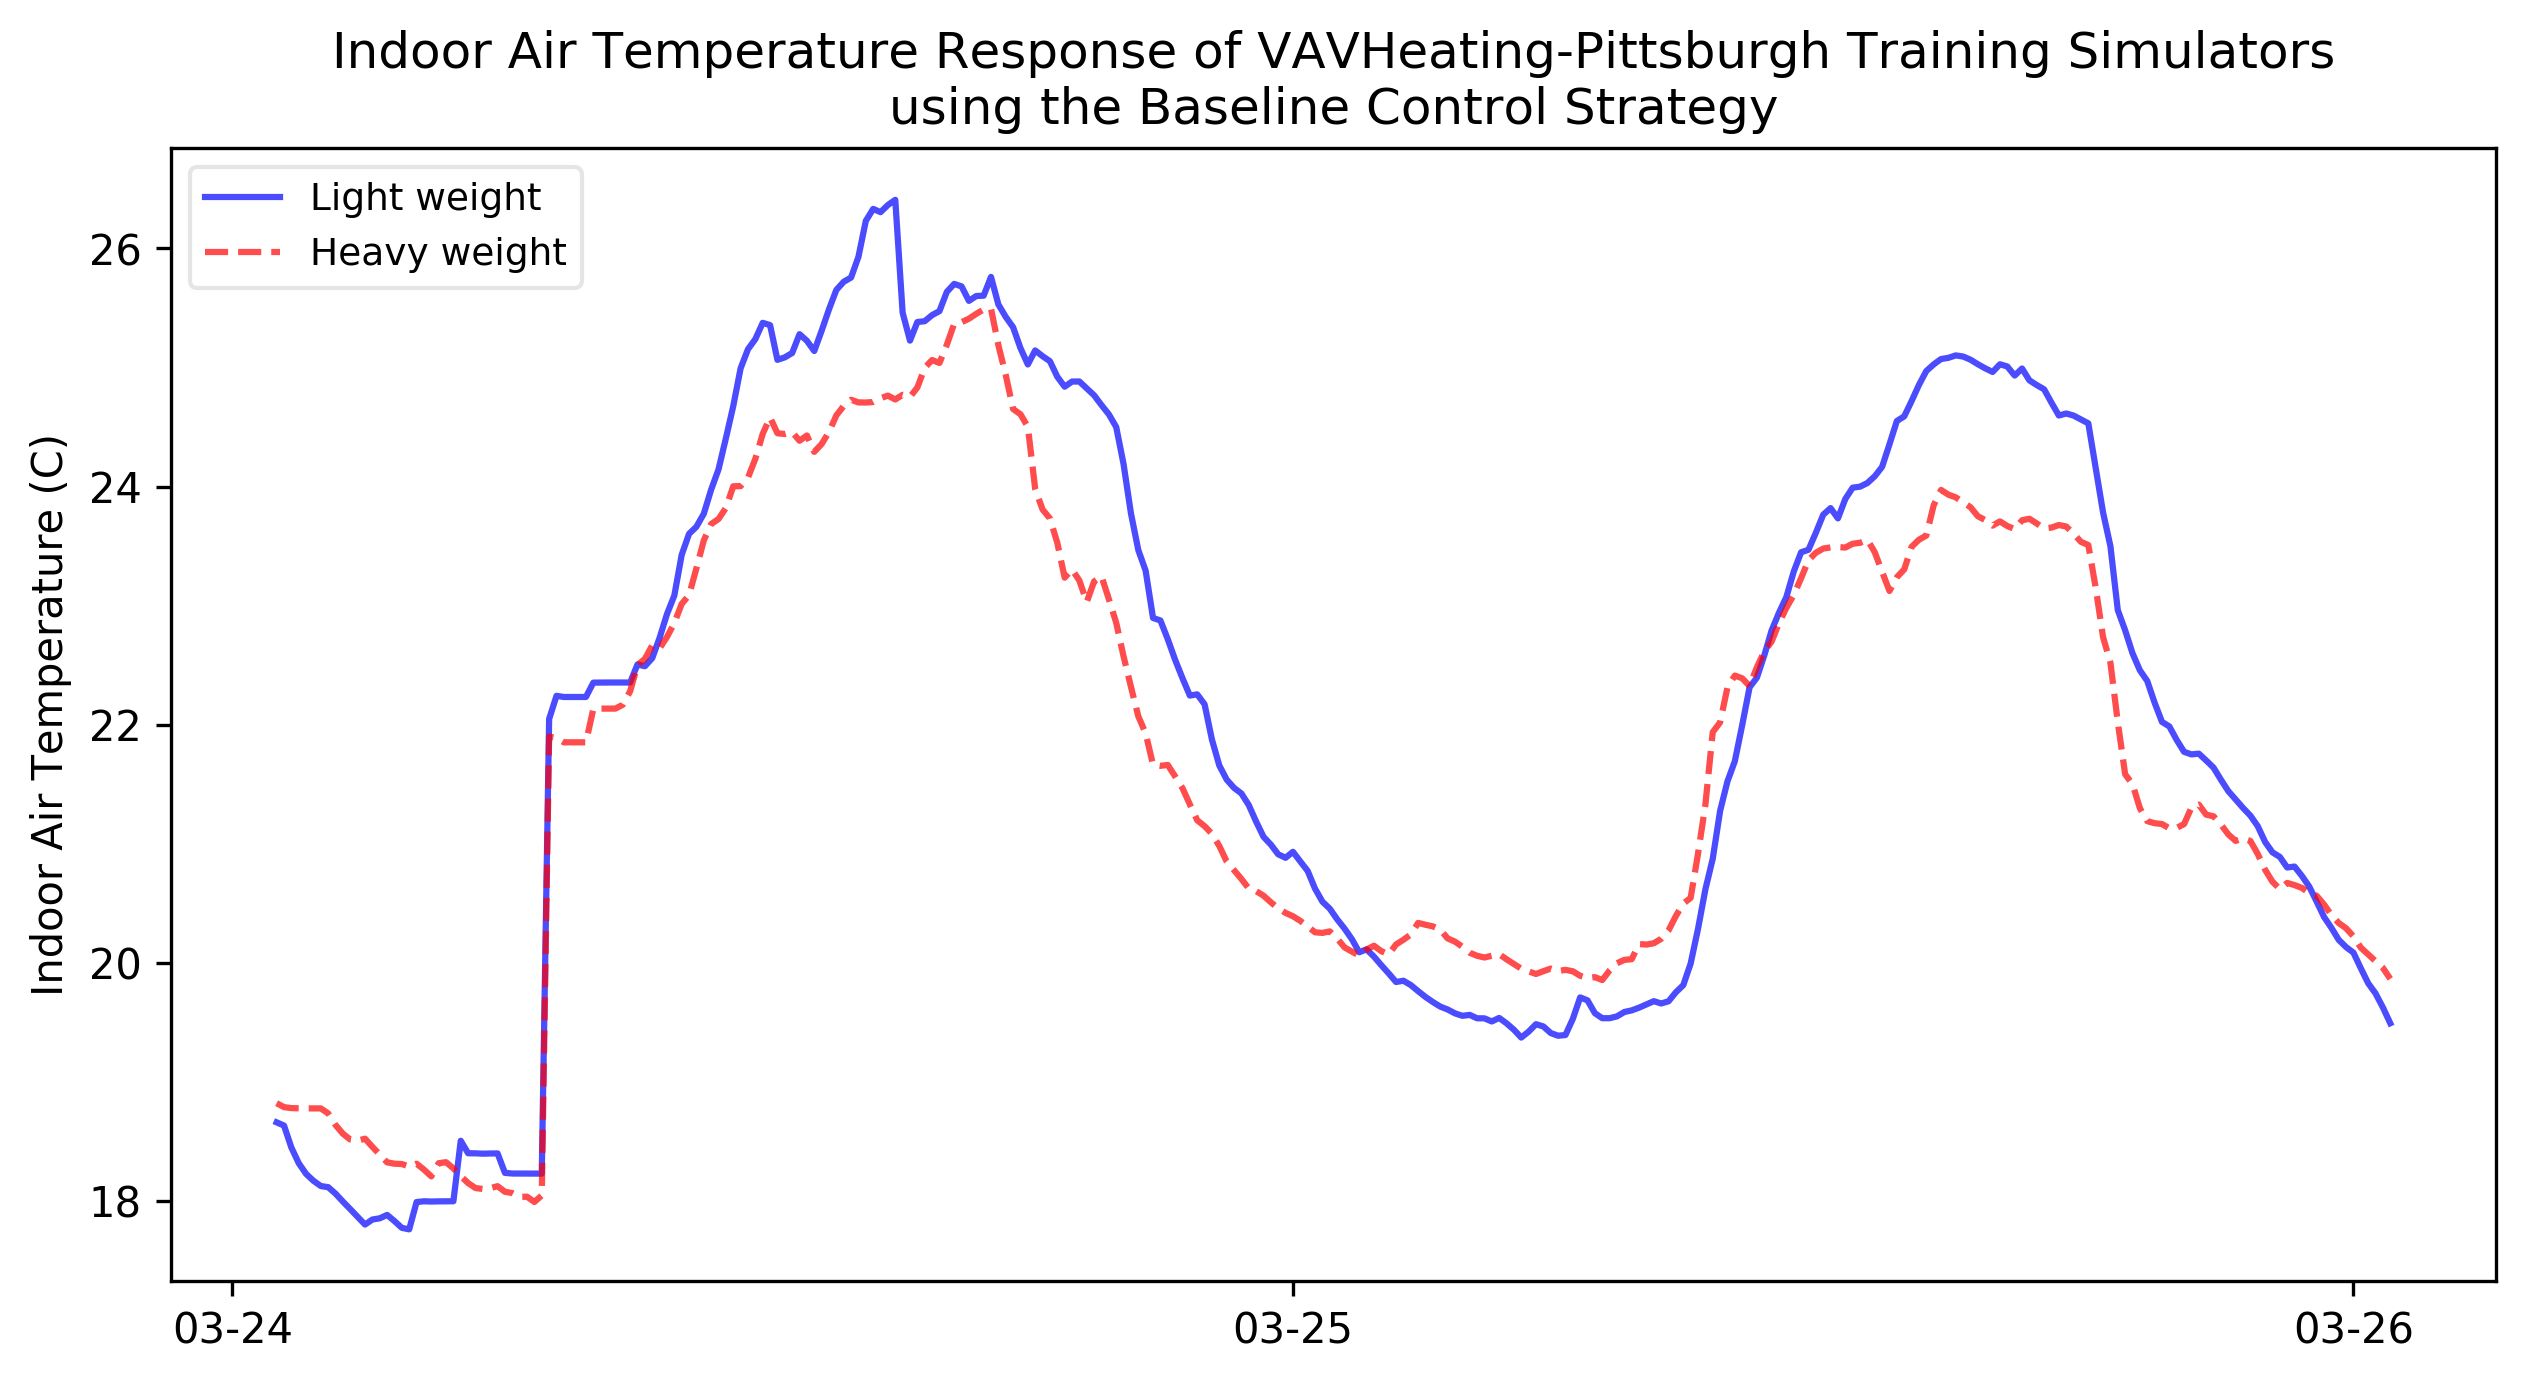

In [8]:
# Model1 light heavy cmp
fig = plt.figure(figsize=(10, 5))
ax1 = plt.subplot2grid((1,1),(0,0))
basetime = datetime.datetime.strptime('2012-06-01', '%Y-%m-%d').date()
x_plot = np.array([basetime + datetime.timedelta(days=i) for i in range(4032)])
yearsFmt = mdates.DateFormatter('%m-%d')
days = mdates.DayLocator(interval = 1)  # every month
# eval 1 2
ax1.plot(model2_pit_lightheavy_cmp['[1] Zone Air Temperature (C)'][11813: 12101],
         color = 'blue', label = 'Light weight', linewidth = 1.5, alpha=0.7, linestyle='-')
ax1.plot(model2_pit_lightheavy_cmp['[2] Zone Air Temperature (C)'][11813: 12101],linestyle='--', 
         color = 'r', label = 'Heavy weight', linewidth = 1.5, alpha=0.7)
ax1.set_ylabel('Indoor Air Temperature (C)', fontsize = 10)
ax1.legend(fontsize = 9, loc="upper left", framealpha=0.5)
ax1.xaxis.set_major_formatter(yearsFmt)
ax1.xaxis.set_major_locator(days)
plt.title('Indoor Air Temperature Response of VAVHeating-Pittsburgh Training Simulators\nusing the Baseline Control Strategy')

In [9]:
model4_pit_lightheavy_cmp = pd.read_csv('part4_pit_light_heavy_cmp.csv',
                             index_col = 0, skiprows = 3, header = 0, parse_dates = True)

In [10]:
model4_pit_lightheavy_cmp['[1] IW North Zone Average Temperature (C)']


Date/Time
2002-01-01 00:10:00    18.749801
2002-01-01 00:20:00    18.732774
2002-01-01 00:30:00    18.707811
2002-01-01 00:40:00    18.706755
2002-01-01 00:50:00    18.696022
2002-01-01 01:00:00    18.713842
2002-01-01 01:10:00    18.759965
2002-01-01 01:20:00    18.822989
2002-01-01 01:30:00    18.882264
2002-01-01 01:40:00    18.895420
2002-01-01 01:50:00    18.888675
2002-01-01 02:00:00    18.867443
2002-01-01 02:10:00    18.838232
2002-01-01 02:20:00    18.802106
2002-01-01 02:30:00    18.760177
2002-01-01 02:40:00    18.716774
2002-01-01 02:50:00    18.668796
2002-01-01 03:00:00    18.652666
2002-01-01 03:10:00    18.704535
2002-01-01 03:20:00    18.796716
2002-01-01 03:30:00    18.868793
2002-01-01 03:40:00    18.917117
2002-01-01 03:50:00    18.946155
2002-01-01 04:00:00    18.959097
2002-01-01 04:10:00    18.999293
2002-01-01 04:20:00    18.993940
2002-01-01 04:30:00    18.981708
2002-01-01 04:40:00    18.953552
2002-01-01 04:50:00    18.915879
2002-01-01 05:00:00    18.872183


In [20]:
model4_pit_act_energy = np.loadtxt('part4_pit_act_energy.csv', delimiter=',')

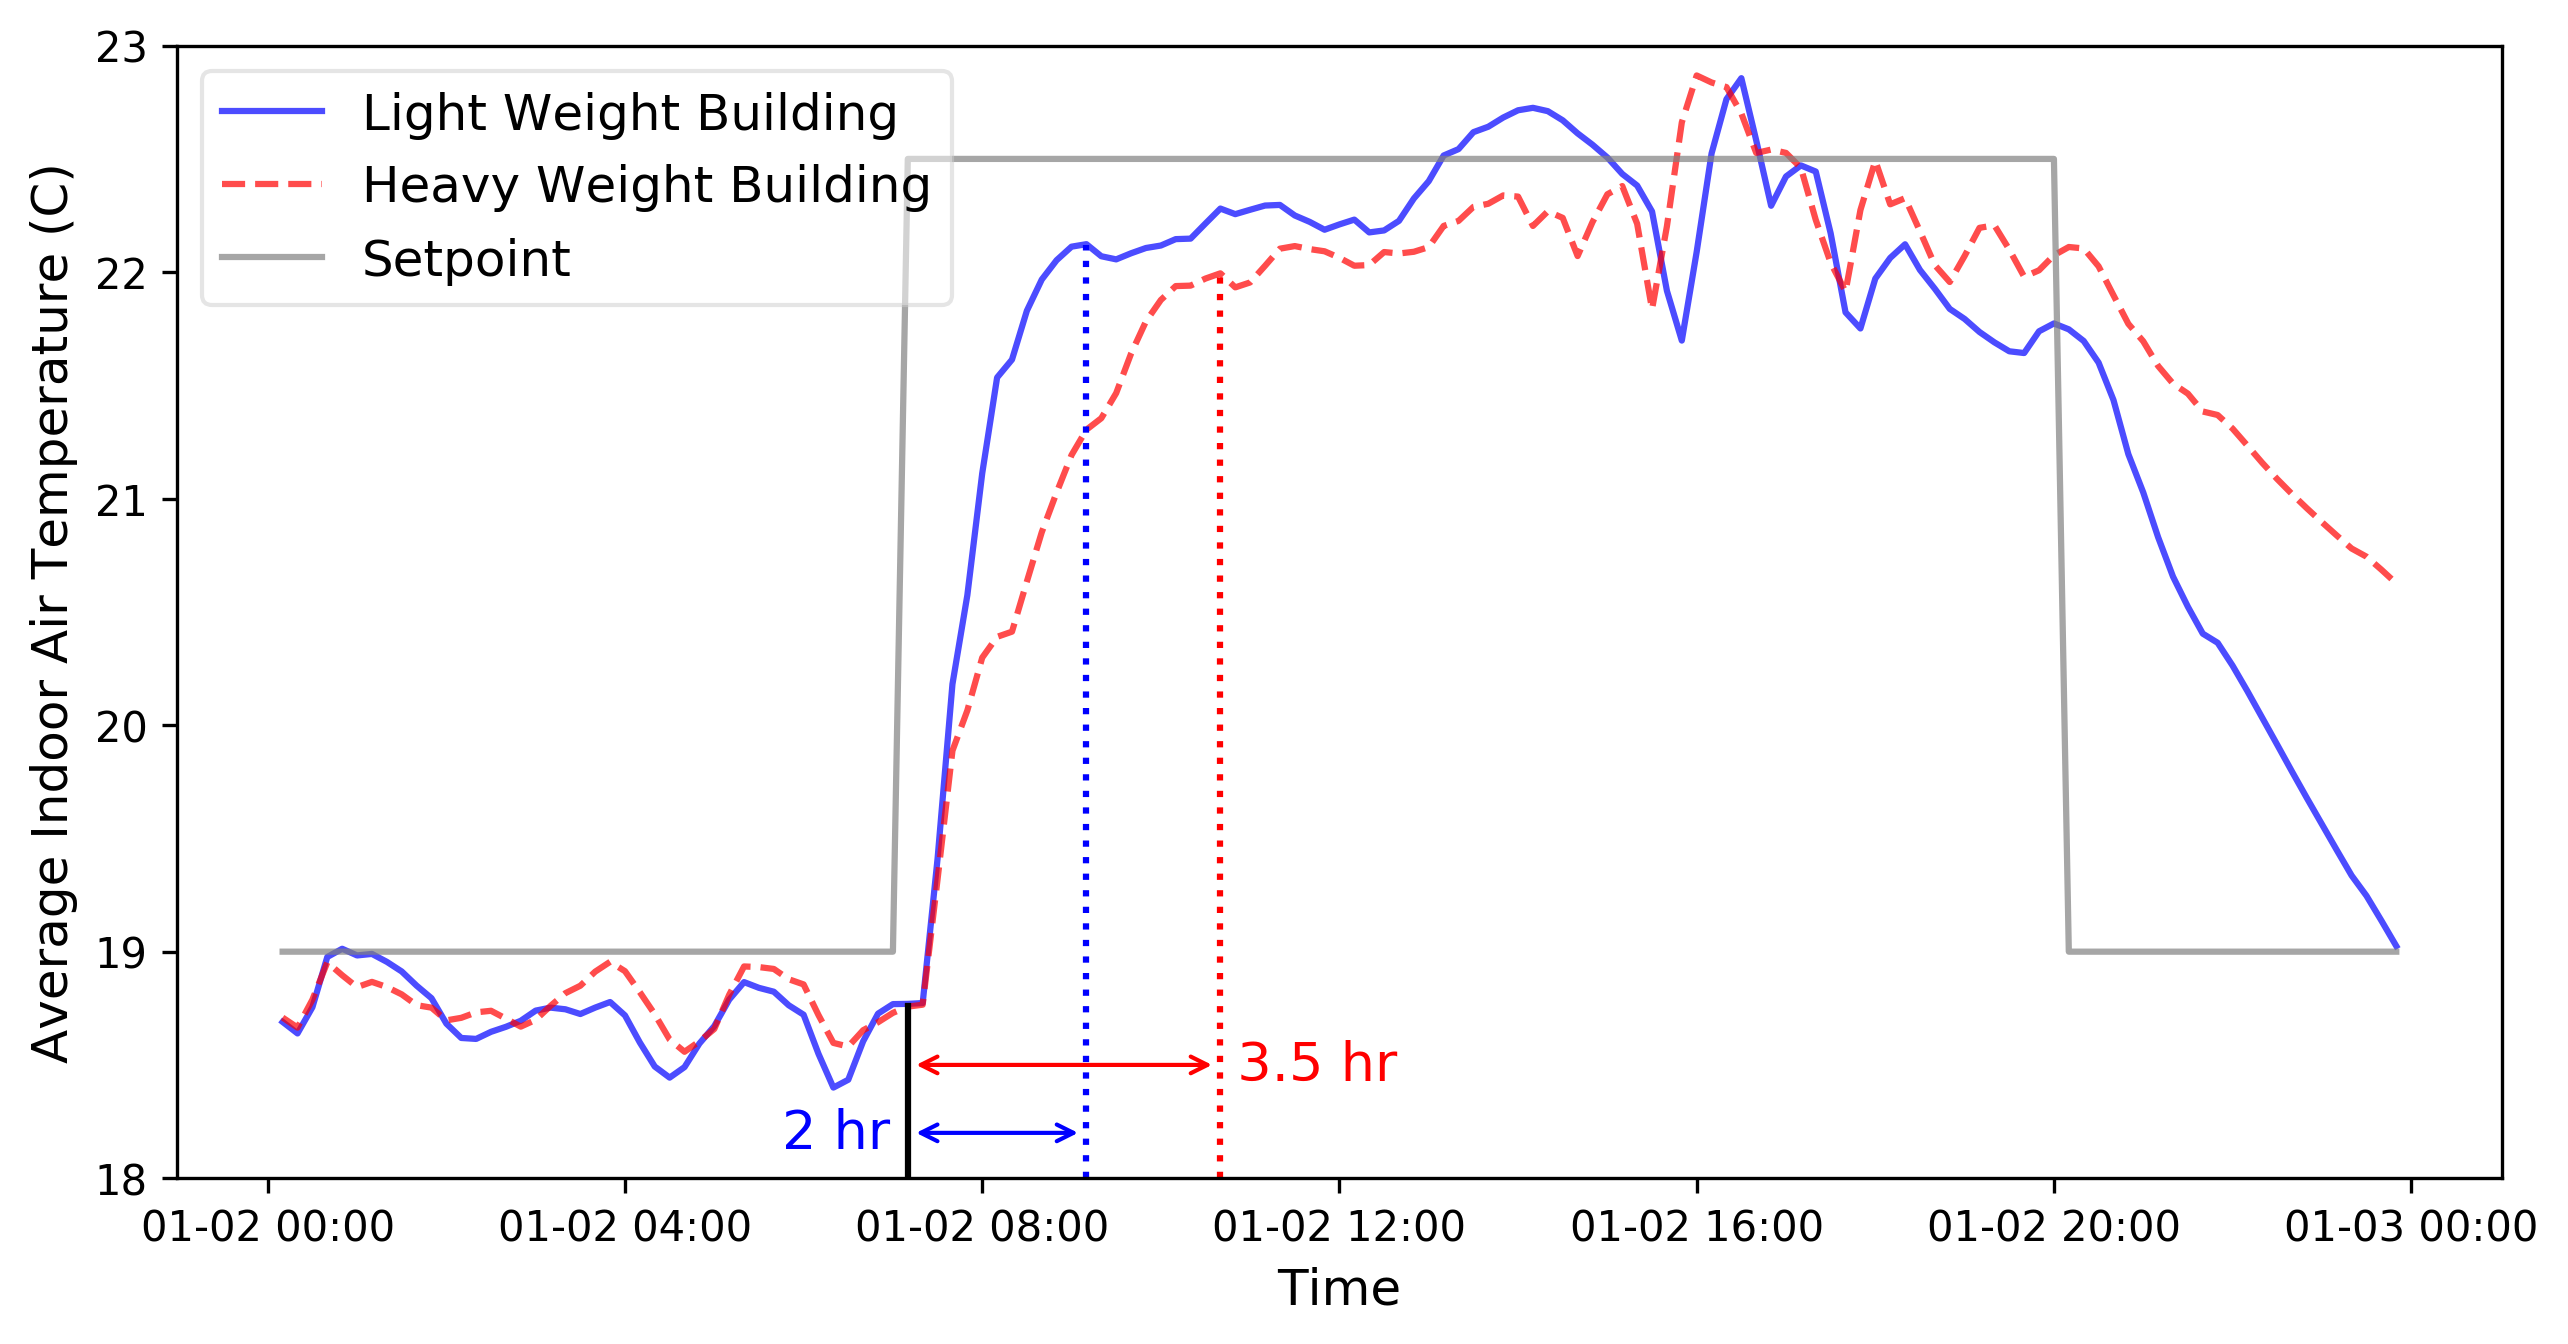

In [78]:
# Model4 light heavy cmp
fig = plt.figure(figsize=(10, 5))
ax1 = plt.subplot2grid((1,1),(0,0))
yearsFmt = mdates.DateFormatter('%m-%d %H:00')
days = mdates.HourLocator(interval = 4)  
# eval 1 2
ax1.plot(model4_pit_lightheavy_cmp['[1] IW North Zone Average Temperature (C)'][144: 287],
         color = 'blue', label = 'Light Weight Building', linewidth = 1.5, alpha=0.7, linestyle='-')
ax1.plot(model4_pit_lightheavy_cmp['[2] IW North Zone Average Temperature (C)'][144: 287],linestyle='--', 
         color = 'r', label = 'Heavy Weight Building', linewidth = 1.5, alpha=0.7)
ax1.plot(model4_pit_lightheavy_cmp['1 setpoint'][144: 287],linestyle='-', 
         color = 'grey', label = 'Setpoint', linewidth = 1.5, alpha=0.7)
ax1.set_ylim([18, 23])
# draw lines
import matplotlib.lines as mlines
import datetime
starttime = datetime.datetime(year=2002, month=1, day=2, hour=7, minute=10)
endtime_lt = datetime.datetime(year=2002, month=1, day=2, hour=9, minute=10)
endtime_hy = datetime.datetime(year=2002, month=1, day=2, hour=10, minute=40)
starttime_ln = mlines.Line2D([starttime,starttime], [18,18.76], color='black', linestyle='-')
endtime_lt_ln = mlines.Line2D([endtime_lt,endtime_lt], [18,22.12], color='blue', linestyle=':')
endtime_hy_ln = mlines.Line2D([endtime_hy,endtime_hy], [18,21.99], color='red', linestyle=':') 
ax1.add_line(starttime_ln)
ax1.add_line(endtime_lt_ln)
ax1.add_line(endtime_hy_ln)
ax1.annotate(s='', xy=(endtime_lt,18.2), xytext=(starttime,18.2), arrowprops=dict(arrowstyle='<->', color='blue'))
ax1.annotate(s='', xy=(endtime_hy,18.5), xytext=(starttime,18.5), arrowprops=dict(arrowstyle='<->', color='red'))
ax1.text(starttime, 18.2,'2 hr ', horizontalalignment='right', verticalalignment='center', color='blue', fontsize=13)
ax1.text(endtime_hy, 18.5,' 3.5 hr', horizontalalignment='left', verticalalignment='center', color='red', fontsize=13)

ax1.set_ylabel('Average Indoor Air Temperature (C)', fontsize = 12)
ax1.set_xlabel('Time', fontsize=12)
ax1.legend(fontsize = 12, loc="upper left", framealpha=0.5)
ax1.xaxis.set_major_formatter(yearsFmt)
ax1.xaxis.set_major_locator(days)

In [21]:
model4_pit_act_energy[:,1]

array([[52.47635083, 60.        ],
       [61.20724662, 60.        ],
       [40.11536588, 20.        ],
       ...,
       [24.12717041, 50.        ],
       [22.4706684 , 25.        ],
       [24.26888488, 25.        ]])

No handles with labels found to put in legend.


Text(0.5,1,'Mullion Heating Demand vs. Control Action\n(Supply Water Temperature Setpoint)\nof RadiantHeating-Pittsburgh-Light Training Simulator\n using a Random Control Strategy')

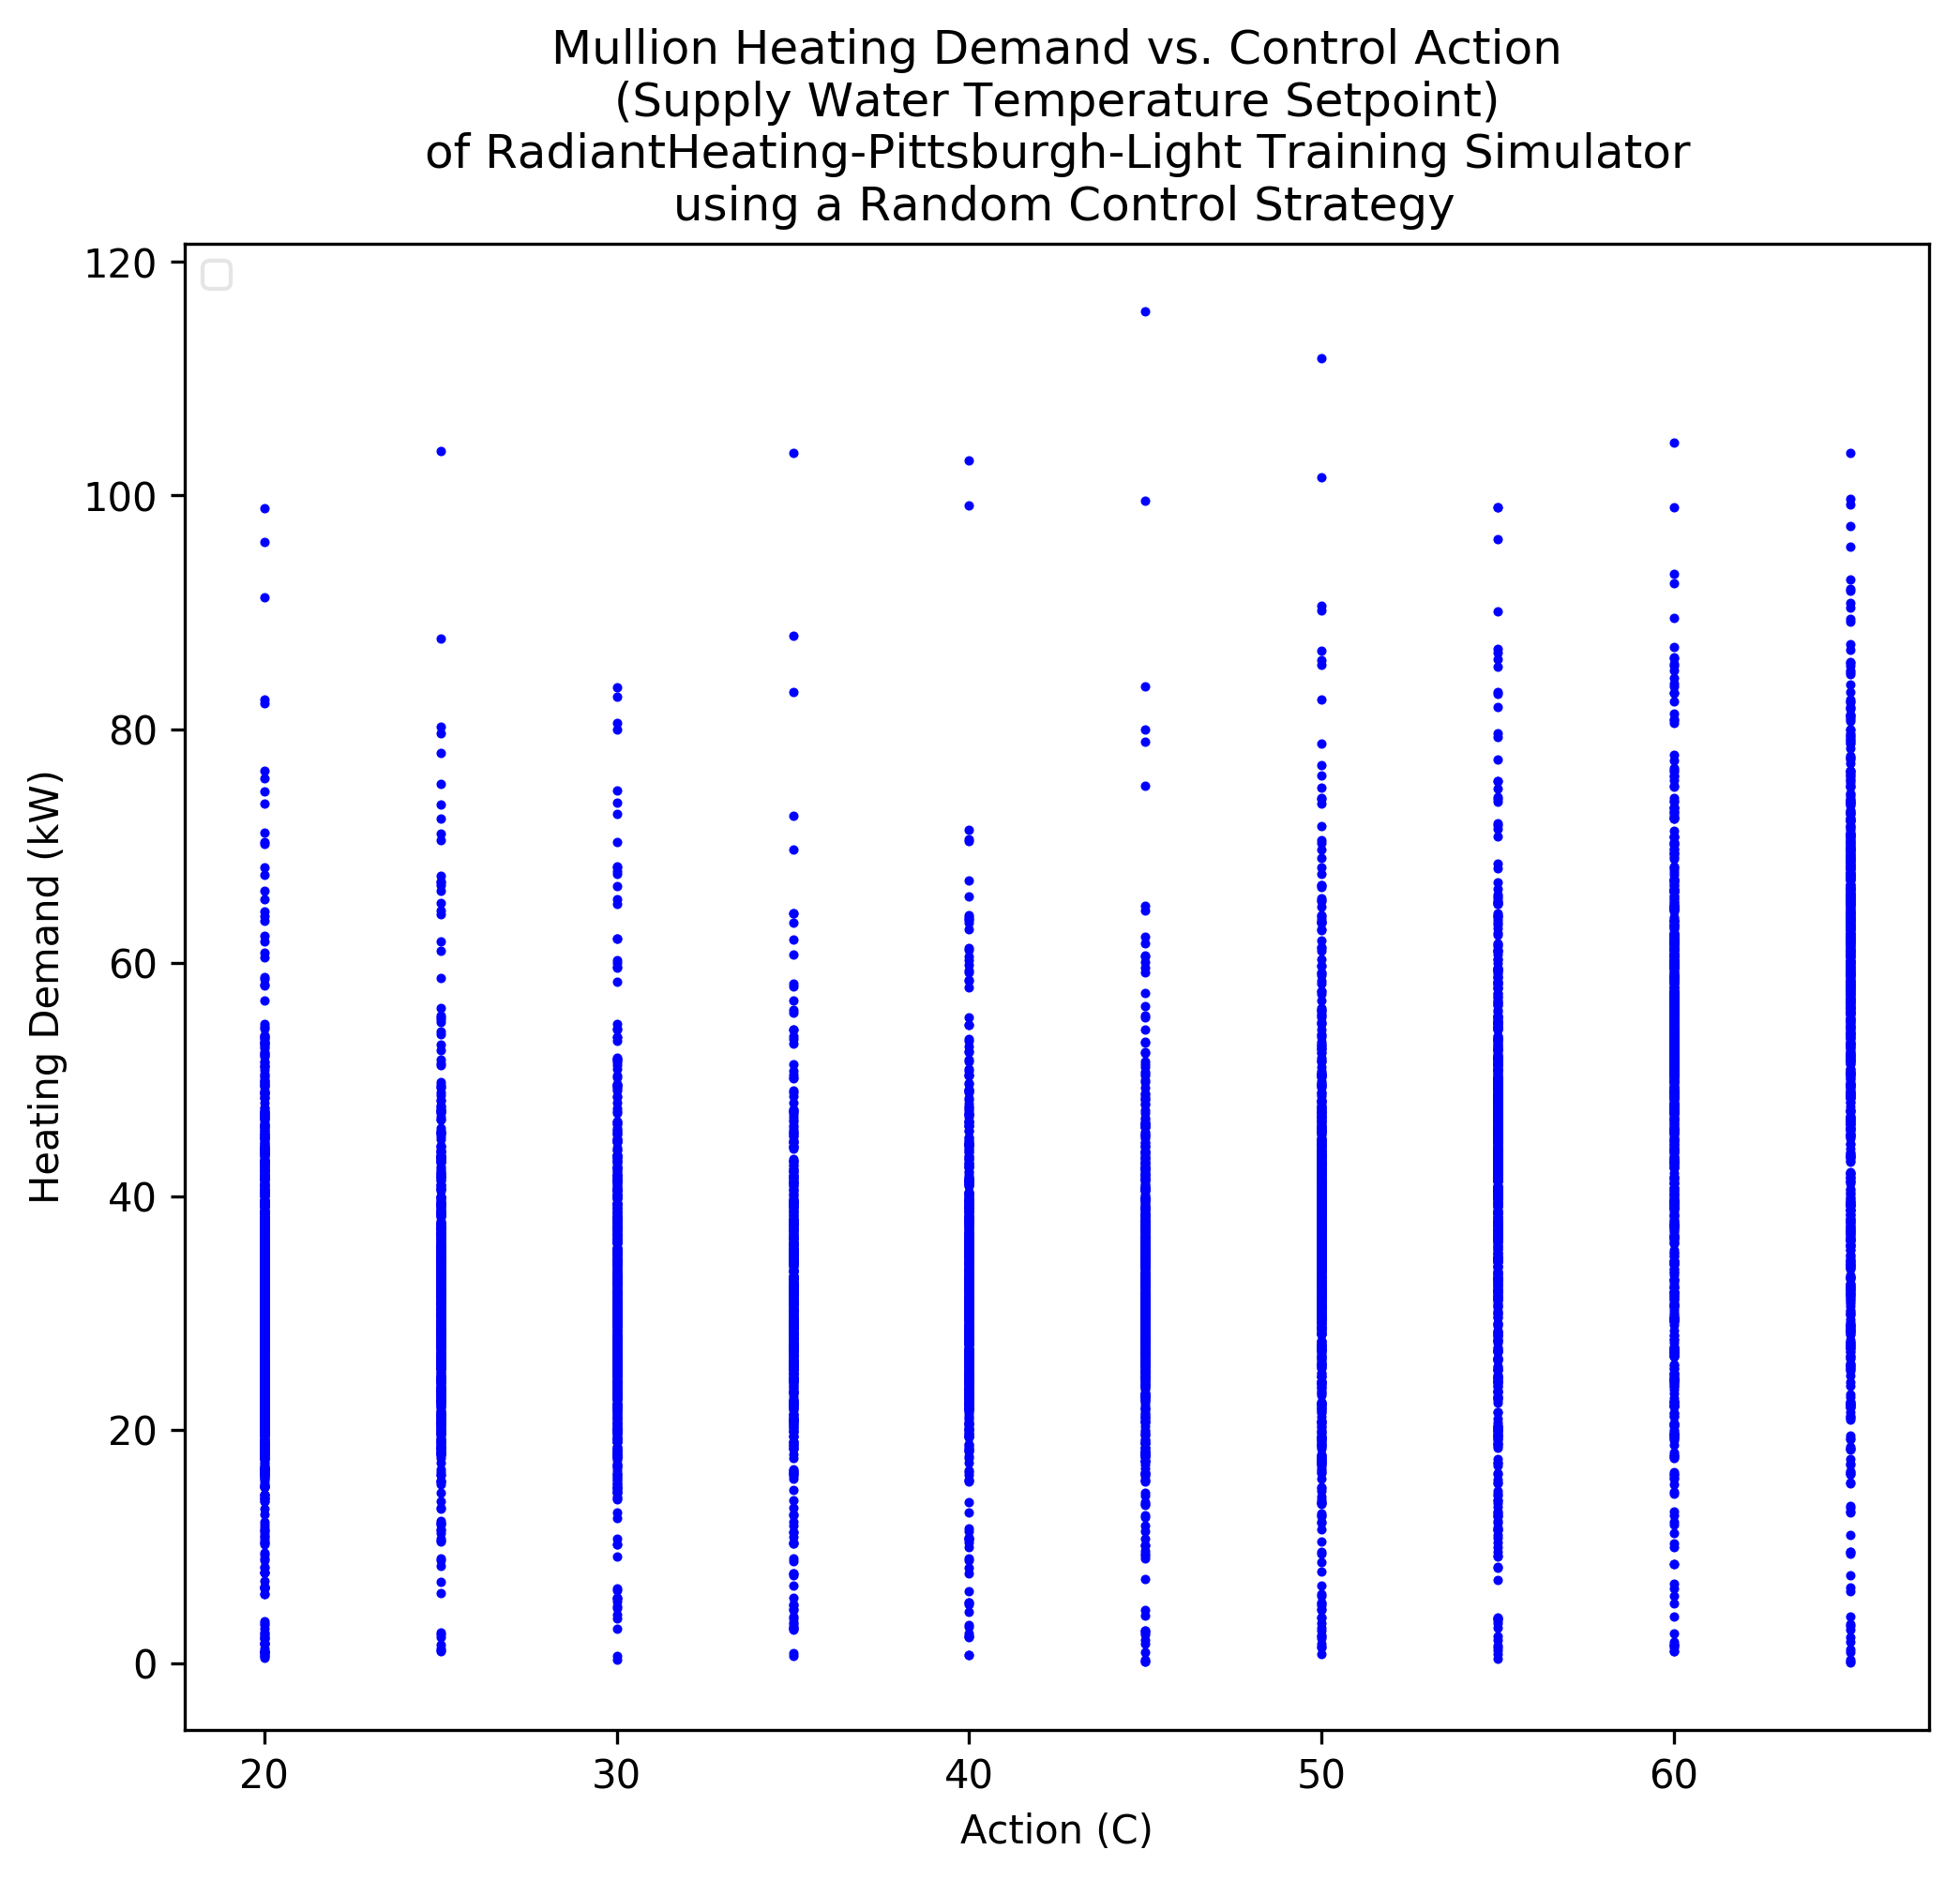

In [33]:
# Model4 light act energy
fig = plt.figure(figsize=(10, 7))
ax1 = plt.subplot2grid((1,1),(0,0))
basetime = datetime.datetime.strptime('2012-06-01', '%Y-%m-%d').date()
x_plot = np.array([basetime + datetime.timedelta(days=i) for i in range(4032)])
yearsFmt = mdates.DateFormatter('%m-%d')
days = mdates.DayLocator(interval = 1)  # every month

ax1.scatter(model4_pit_act_energy[:, 1],model4_pit_act_energy[:, 0],
         color = 'blue', s=2)

ax1.set_ylabel('Heating Demand (kW)', fontsize = 10)
ax1.set_xlabel('Action (C)', fontsize = 10)
ax1.legend(fontsize = 9, loc="upper left", framealpha=0.5)
plt.title('Mullion Heating Demand vs. Control Action\n(Supply Water Temperature Setpoint)\nof RadiantHeating-Pittsburgh-Light Training Simulator\n using a Random Control Strategy')